In [1]:
import pickle
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from genbench3d.sb_model import LiGAN, ThreeDSBDD, Pocket2Mol, TargetDiff, DiffSBDD, ResGen
from genbench3d.data.source import CrossDocked

/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/sklearn/utils/multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1


In [2]:
models = [LiGAN(), 
          ThreeDSBDD(), 
          Pocket2Mol(), 
          TargetDiff(), 
          DiffSBDD(),
          ResGen()]

test_crossdocked = CrossDocked(subset='test')
results_dirpath = '/home/bb596/hdd/ThreeDGenMolBenchmark/results/'

In [3]:
minimizes = [False, True]
d_results = {}
n_res = 0
for ligand_filename in test_crossdocked.get_ligand_filenames():
    d_results[ligand_filename] = {}
    for minimize in minimizes:
        d_results[ligand_filename][minimize] = {}
        for model in models:
            target_dirname, real_ligand_filename = ligand_filename.split('/') 
            if minimize:
                results_filename = real_ligand_filename.replace('.sdf', 
                                                            f'_results_{model.name}_minimized.p')
            else:
                results_filename = real_ligand_filename.replace('.sdf', 
                                                            f'_results_{model.name}.p')
            
            results_filepath = os.path.join(results_dirpath, results_filename)

            if os.path.exists(results_filepath):
                with open(results_filepath, 'rb') as f:
                    results = pickle.load(f)
                d_results[ligand_filename][minimize][model.name] = results
                n_res += 1
            else:
                print(results_filepath + ' does not exist')

/home/bb596/hdd/ThreeDGenMolBenchmark/results/2v3r_A_rec_1dy4_snp_lig_tt_docked_1_results_ResGen.p does not exist
/home/bb596/hdd/ThreeDGenMolBenchmark/results/2v3r_A_rec_1dy4_snp_lig_tt_docked_1_results_ResGen_minimized.p does not exist
/home/bb596/hdd/ThreeDGenMolBenchmark/results/1a2g_A_rec_4jmv_1ly_lig_tt_min_0_results_LiGAN.p does not exist
/home/bb596/hdd/ThreeDGenMolBenchmark/results/1a2g_A_rec_4jmv_1ly_lig_tt_min_0_results_3D_SBDD.p does not exist
/home/bb596/hdd/ThreeDGenMolBenchmark/results/1a2g_A_rec_4jmv_1ly_lig_tt_min_0_results_Pocket2Mol.p does not exist
/home/bb596/hdd/ThreeDGenMolBenchmark/results/1a2g_A_rec_4jmv_1ly_lig_tt_min_0_results_TargetDiff.p does not exist
/home/bb596/hdd/ThreeDGenMolBenchmark/results/1a2g_A_rec_4jmv_1ly_lig_tt_min_0_results_DiffSBDD.p does not exist
/home/bb596/hdd/ThreeDGenMolBenchmark/results/1a2g_A_rec_4jmv_1ly_lig_tt_min_0_results_ResGen.p does not exist
/home/bb596/hdd/ThreeDGenMolBenchmark/results/1a2g_A_rec_4jmv_1ly_lig_tt_min_0_results

In [4]:
print(n_res)

736


In [89]:
rows = []
for ligand_filename in test_crossdocked.get_ligand_filenames():
    all_model_tested = len(d_results[ligand_filename][False]) == len(models)
    all_mini_model_tested = len(d_results[ligand_filename][True]) == len(models)
    if all_model_tested and all_mini_model_tested:
        for minimize in minimizes:
            for model in models:
                model_results = d_results[ligand_filename][minimize][model.name]
                if minimize:
                    set_names = ['minimized', 'minimized_valid']
                else:
                    set_names = ['raw', 'raw_valid']
                for set_name in set_names:
                    row = {'Model' : model.name,
                          'Minimized': minimize,
                          'Valid only': 'valid' in set_name,
                          'Ligand filename': ligand_filename}
                    set_results = model_results[set_name]
                    for name, values in set_results.items():
                        if isinstance(values, dict):
                            for k, v in values.items():
                                if (not isinstance(v, list)) and (not isinstance(v, dict)):
                                    row[name+str(k)] = v
                        elif isinstance(values, list):
                            value = np.nanmedian(values)
                            row[name] = value
                        else:
                            value = values
                            row[name] = value
                    rows.append(row)

/tmp/ipykernel_1894219/2615853349.py:25: RuntimeWarning: All-NaN slice encountered
  value = np.nanmedian(values)


In [90]:
df = pd.DataFrame(rows)

In [91]:
for k in df.keys():
    print(k)

Model
Minimized
Valid only
Ligand filename
Steric clash
Distance to native centroid
Vina score
Minimized Vina score
Glide score
Minimized Glide score
Gold PLP score
Relative Vina score
Relative Min Vina score
Relative Glide score
Relative Min Glide score
Relative PLP score
Validity2D
Uniqueness2D
Diversity2D
Ring proportion3
Ring proportion5
Ring proportion4
Ring proportion7
Ring proportion6
MW
logP
SAScore
QED
Validity3D CSD
Strain energy
Number of tested confs
Uniqueness3D
Diversity3D
Number of valid 3D confs (Validity3D CSD)
Number of invalid bonds (Validity3D CSD)
Number of invalid angles (Validity3D CSD)
Number of invalid torsions (Validity3D CSD)
Number of invalid rings (Validity3D CSD)
Number of new patterns (Validity3D CSD)
Number of new unique patterns (Validity3D CSD)
Min bond q-value (Validity3D CSD)
Geometric mean bond q-value (Validity3D CSD)
Min angle q-value (Validity3D CSD)
Geometric mean angle q-value (Validity3D CSD)
Min torsion q-value (Validity3D CSD)
Geometric mean

In [92]:
df = df.dropna(how='all', axis=1)

In [97]:
df2 = df[(df['Minimized'] & df['Valid only']) | (~df['Minimized'] & ~df['Valid only'])]

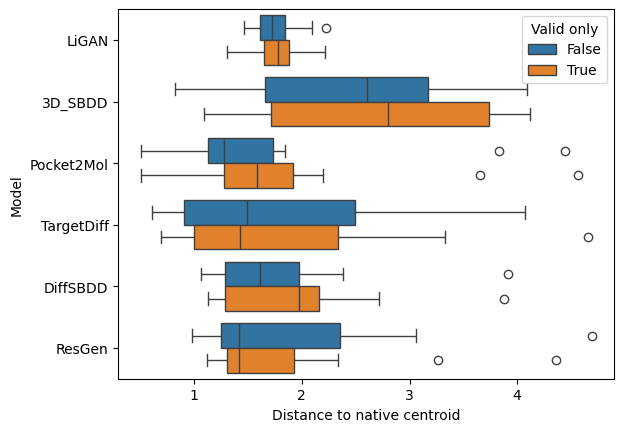

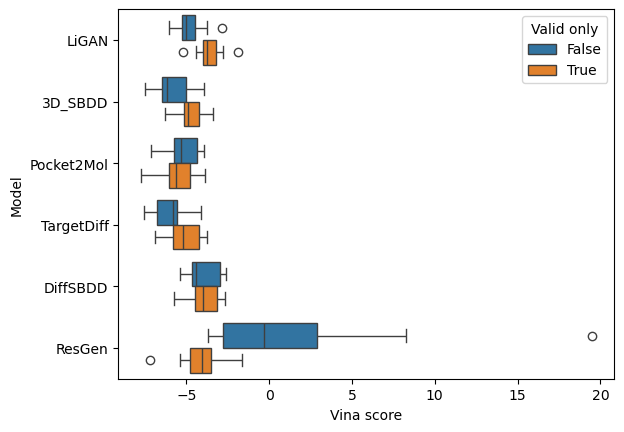

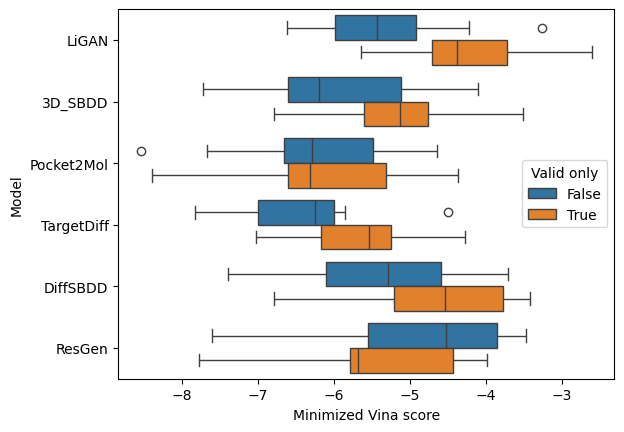

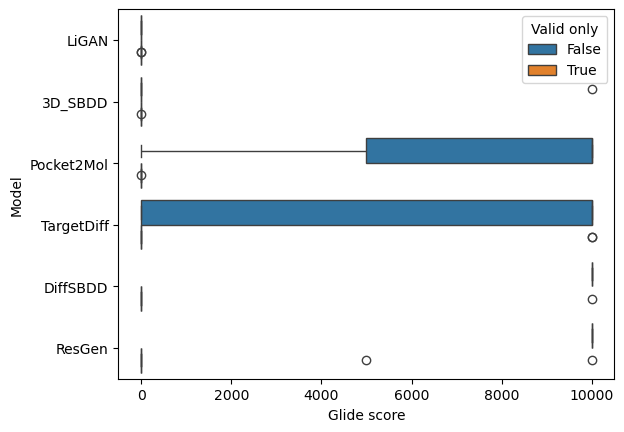

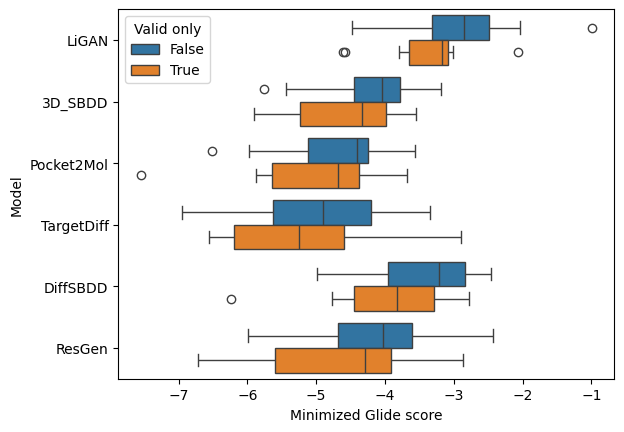

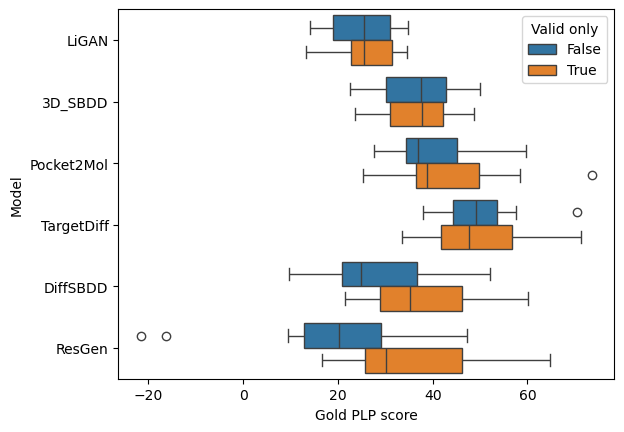

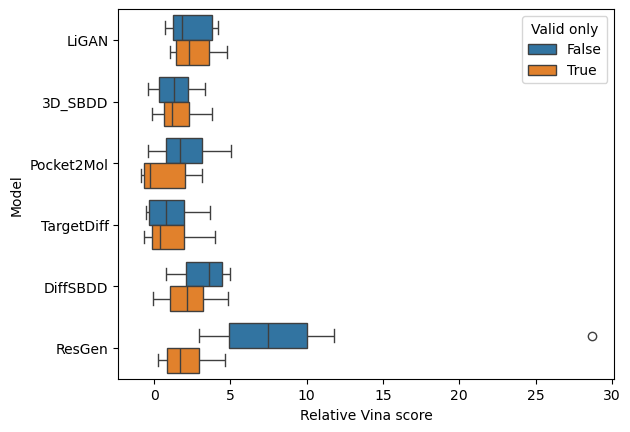

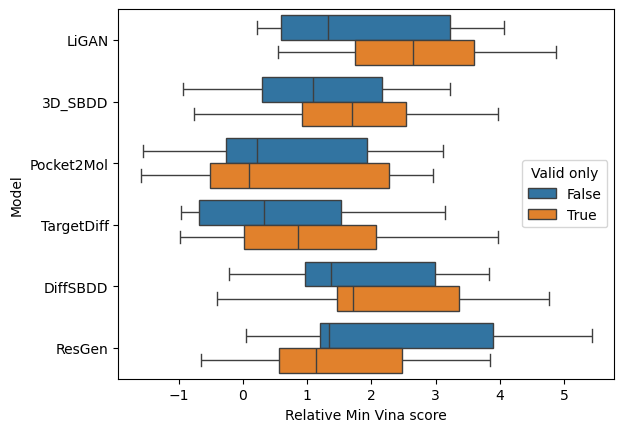

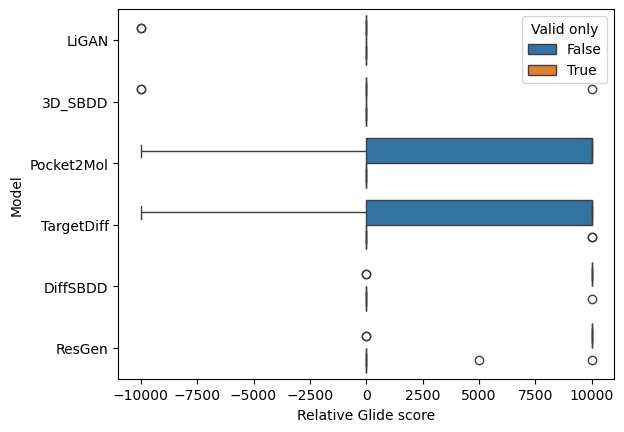

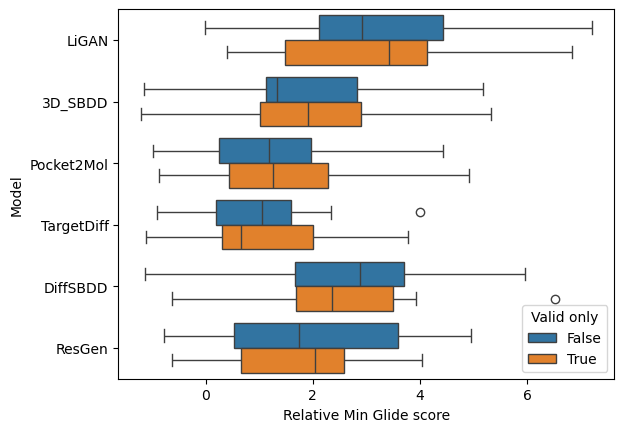

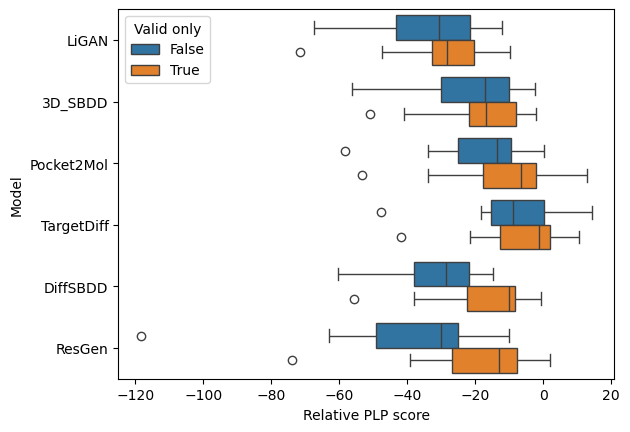

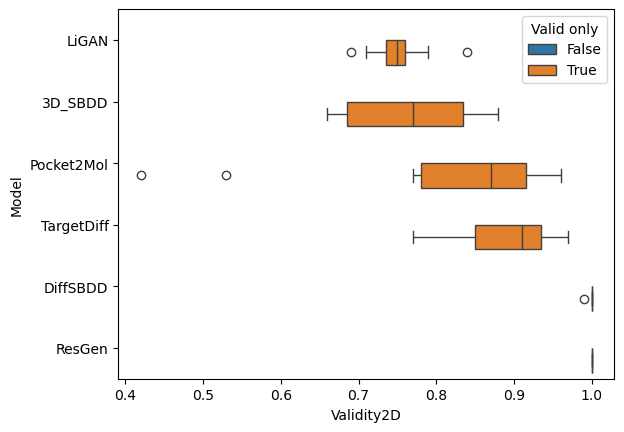

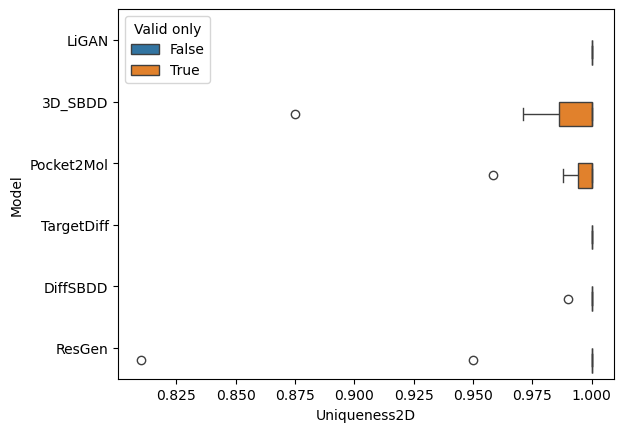

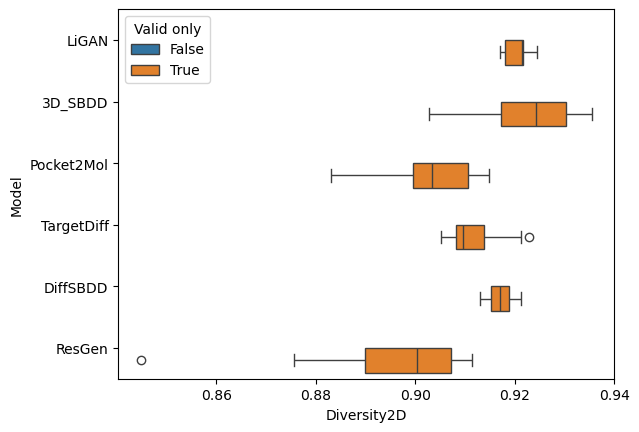

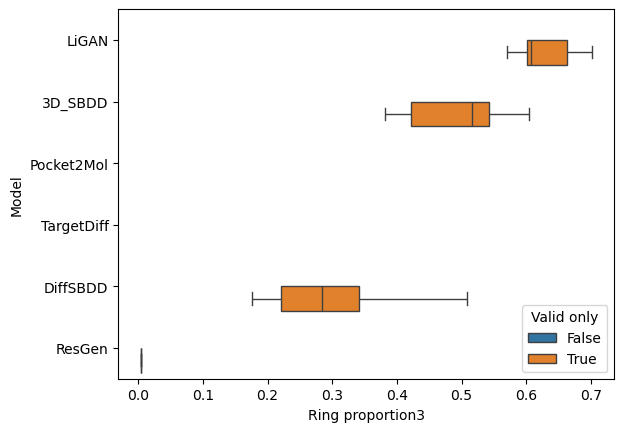

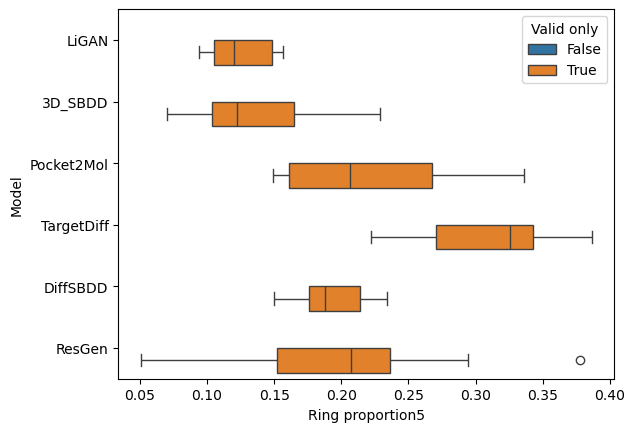

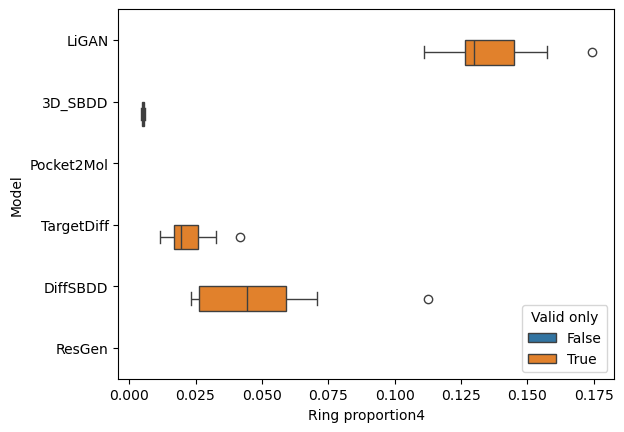

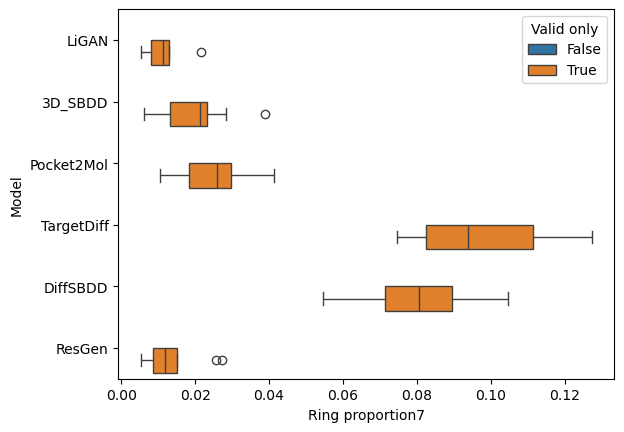

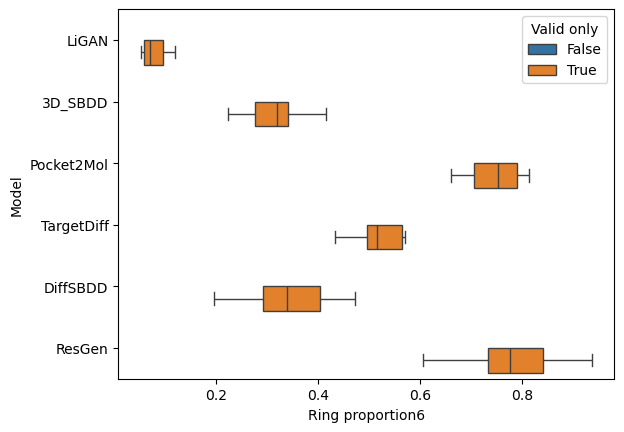

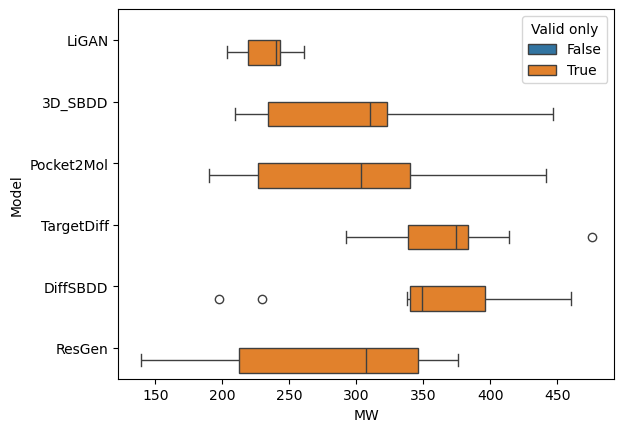

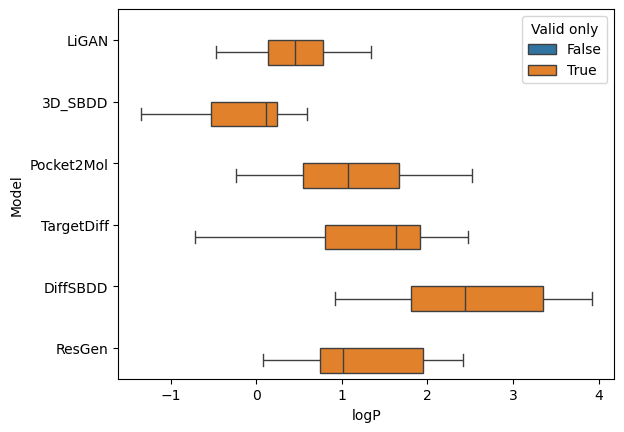

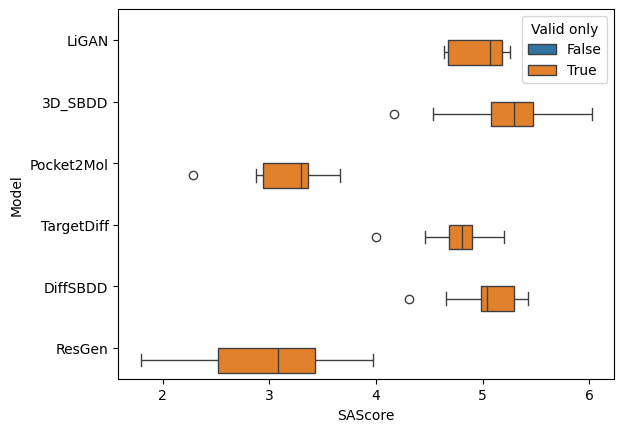

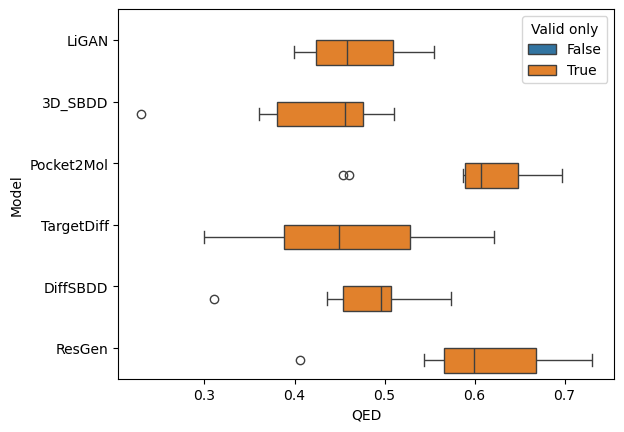

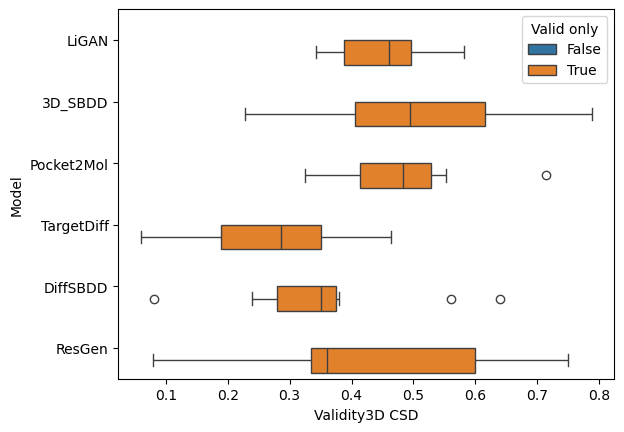

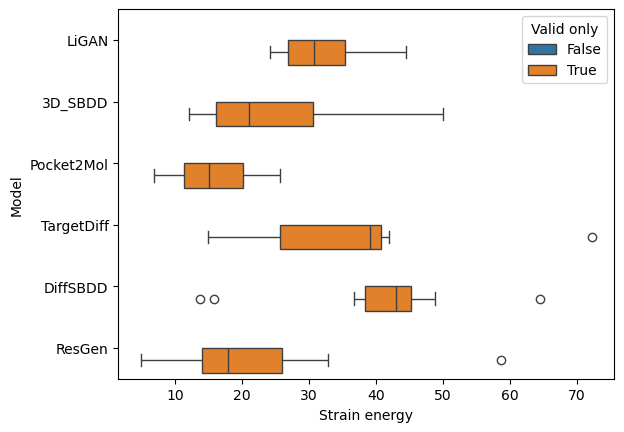

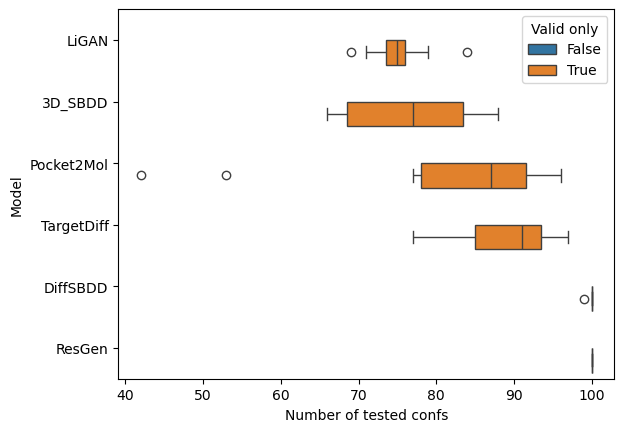

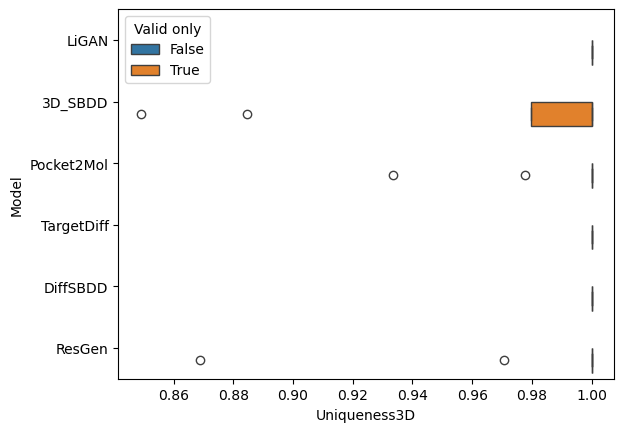

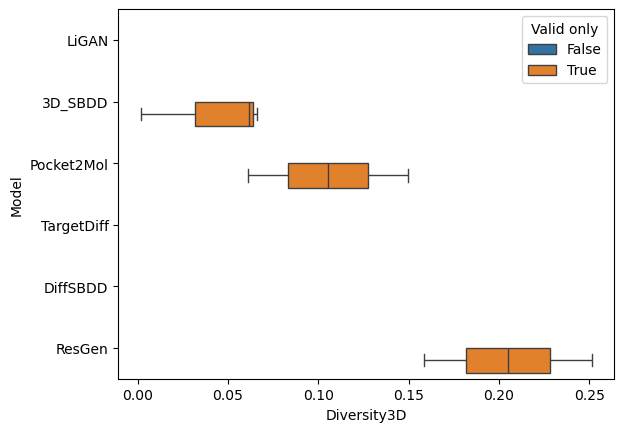

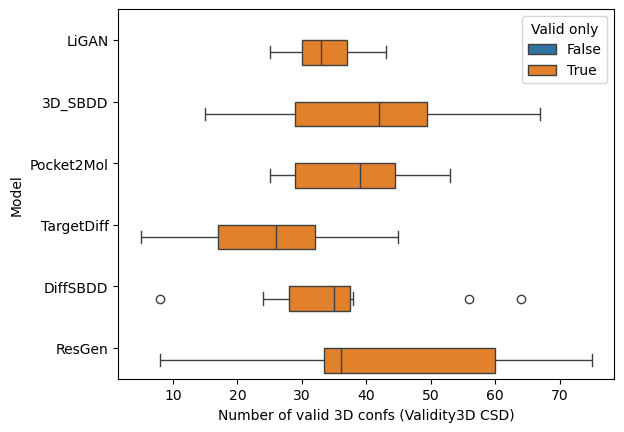

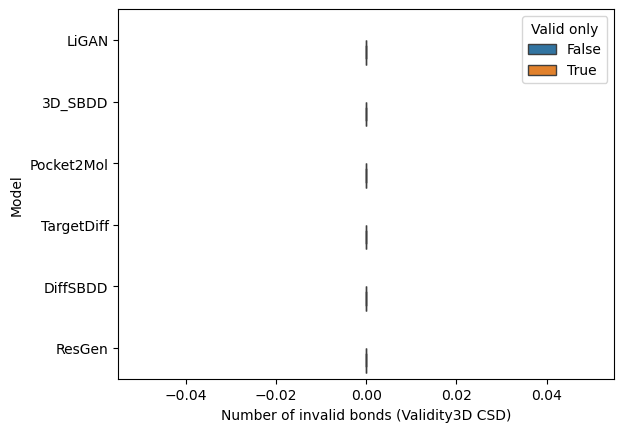

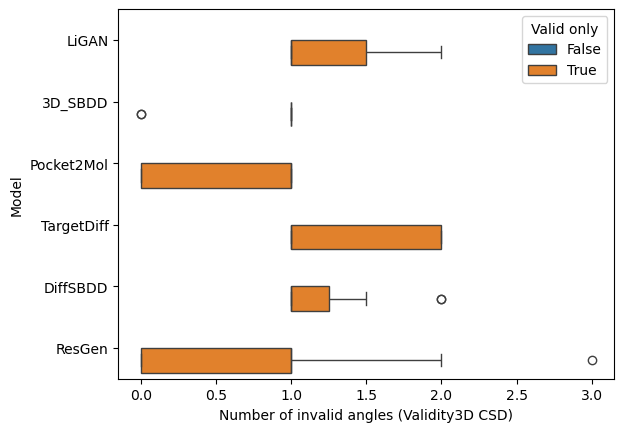

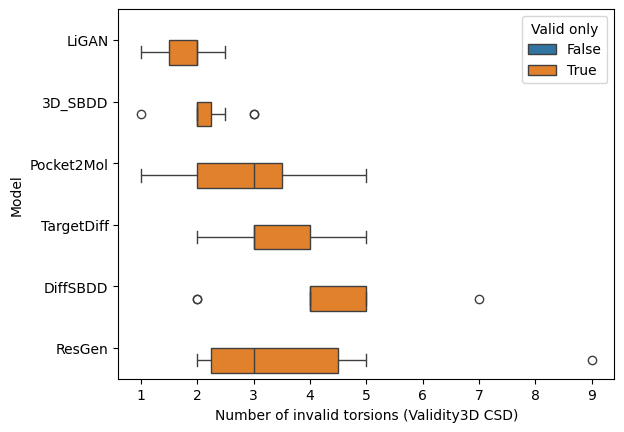

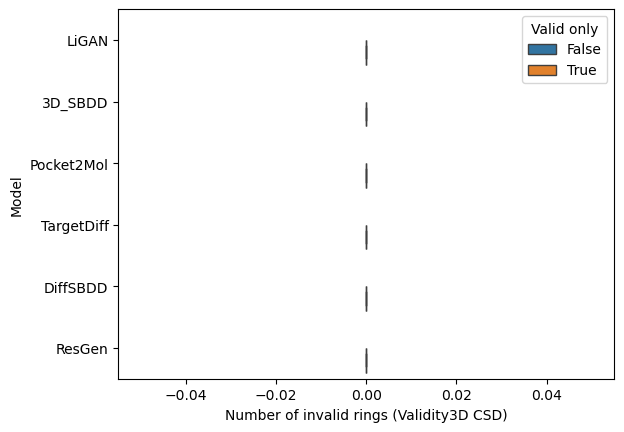

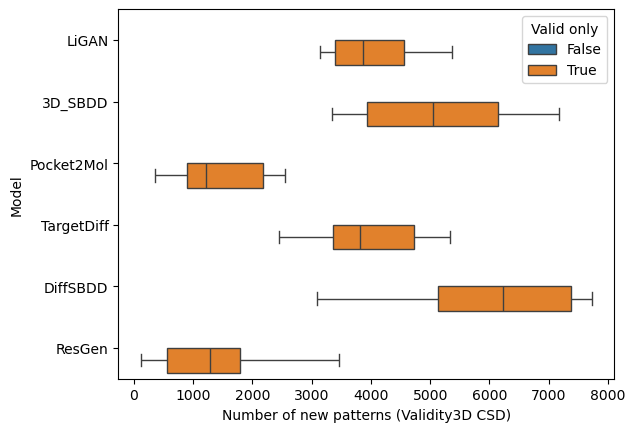

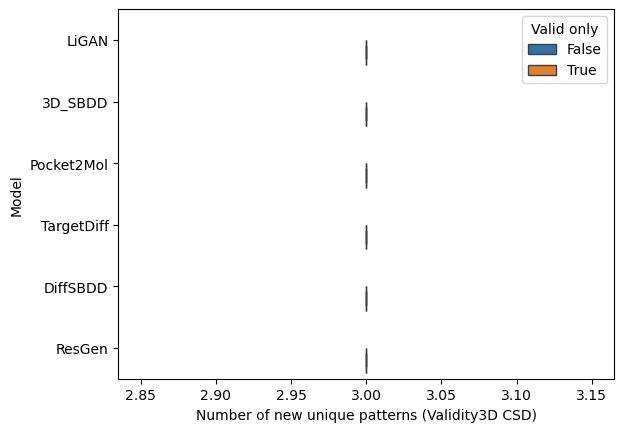

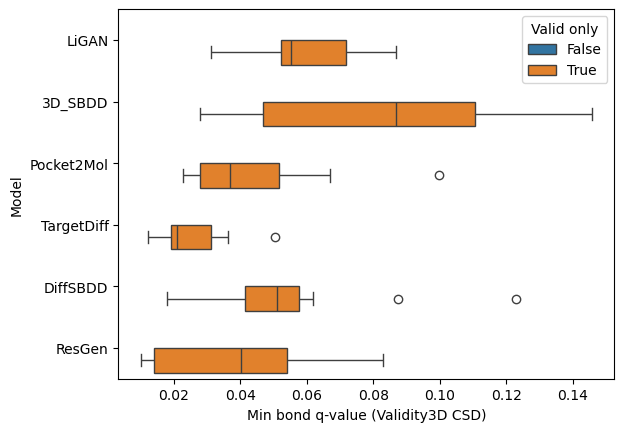

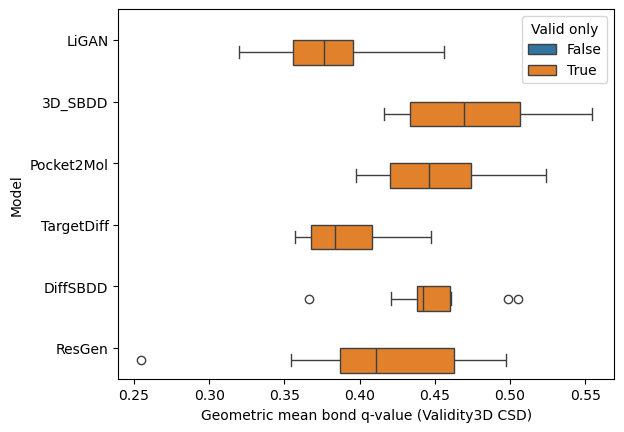

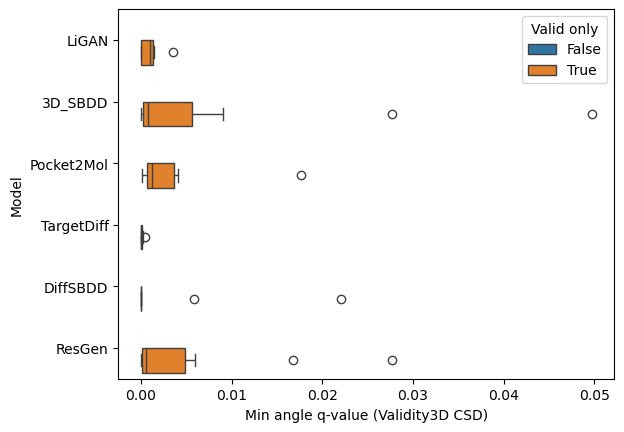

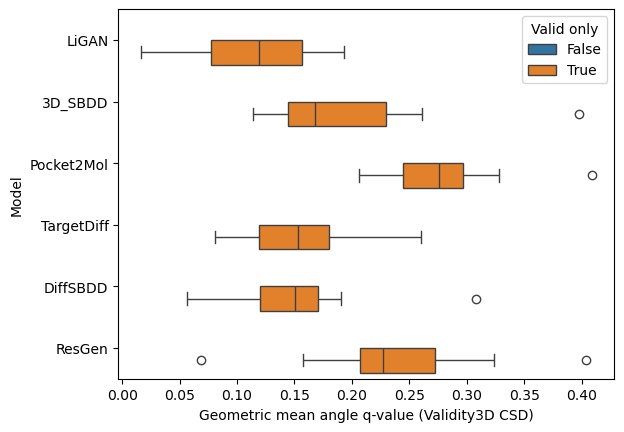

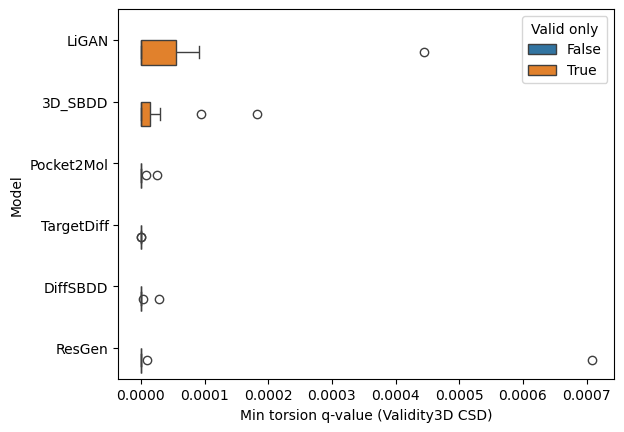

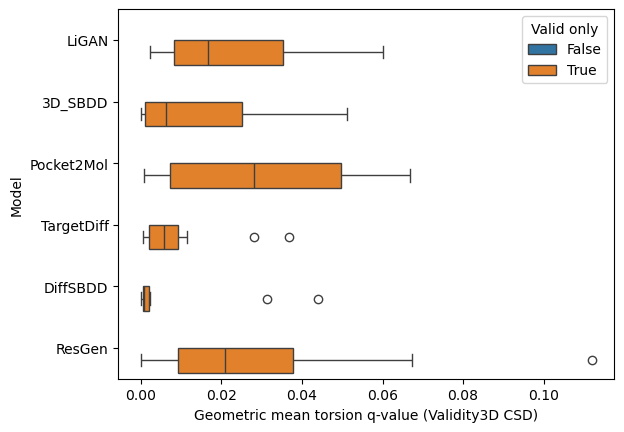

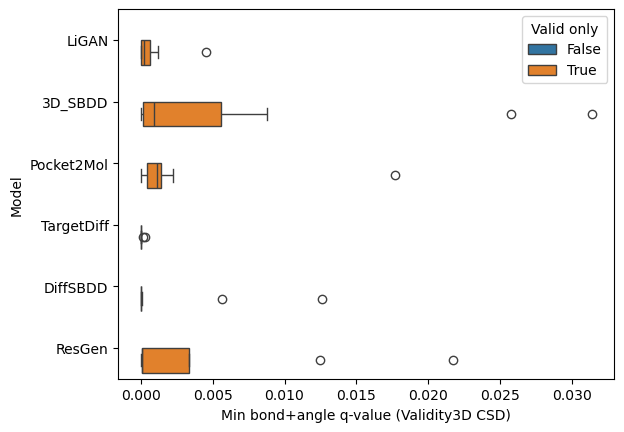

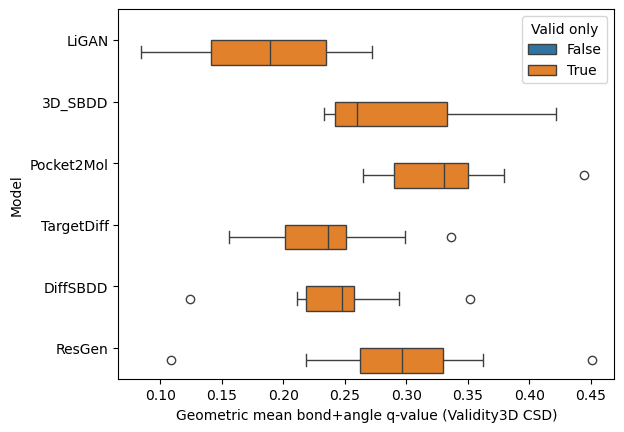

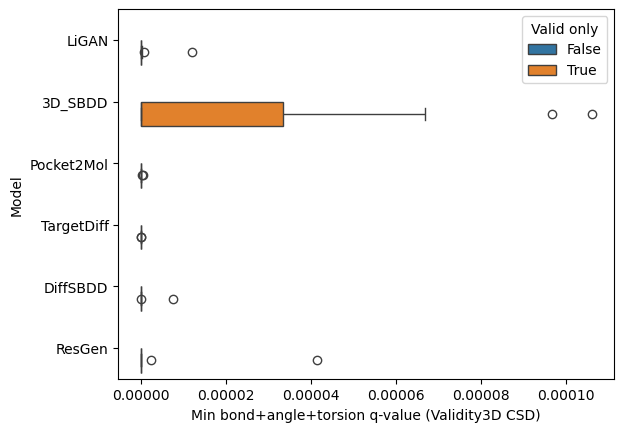

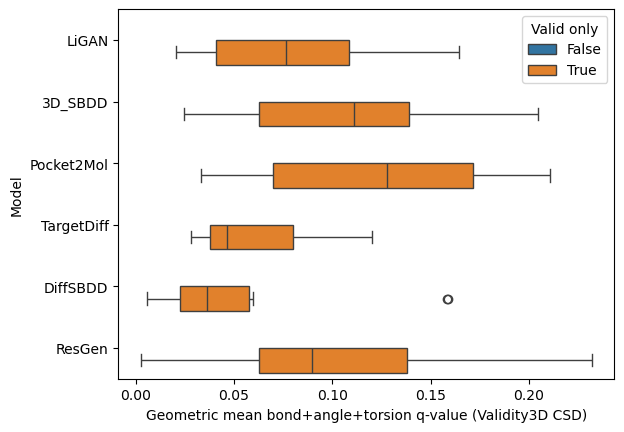

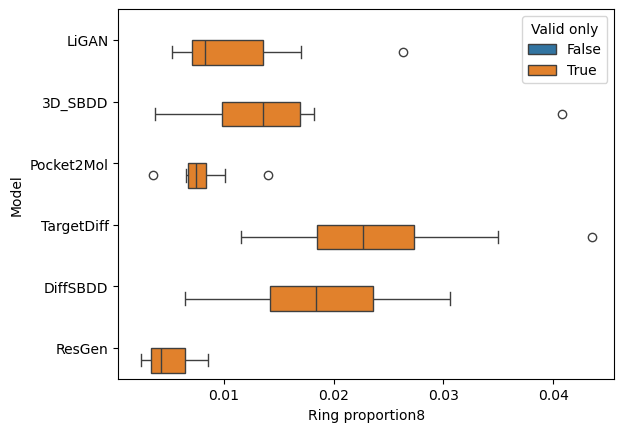

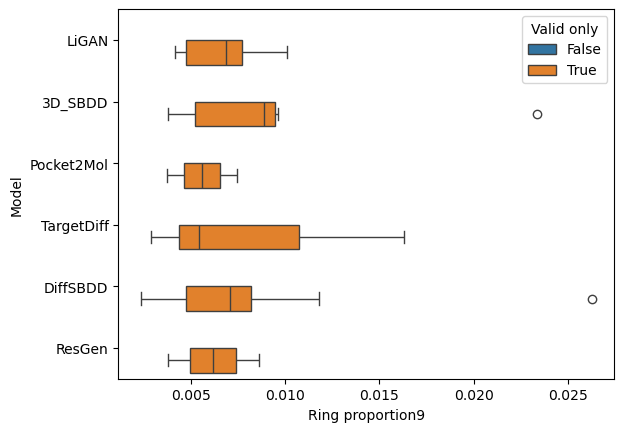

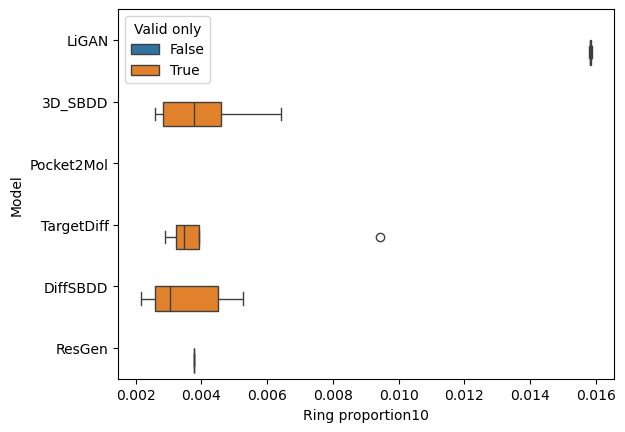

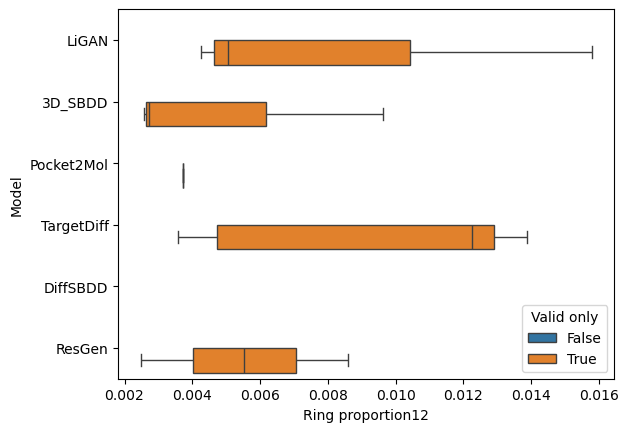

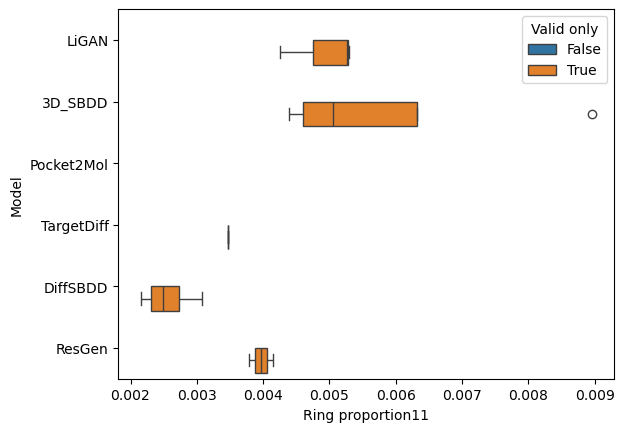

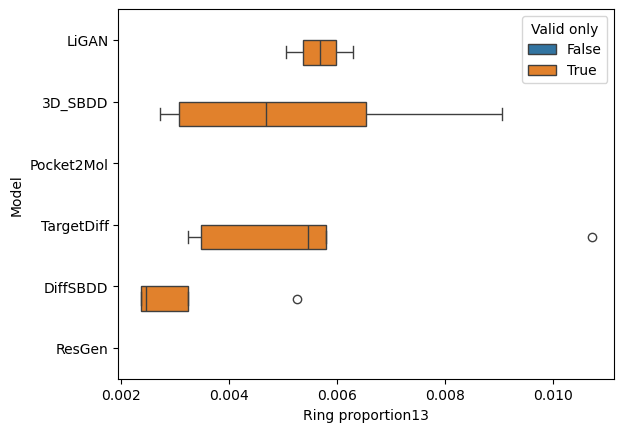

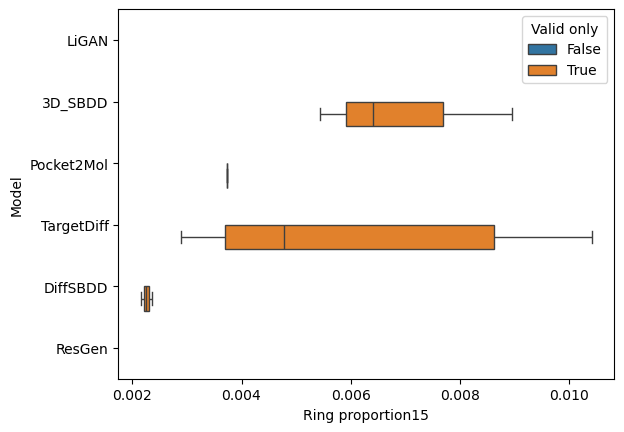

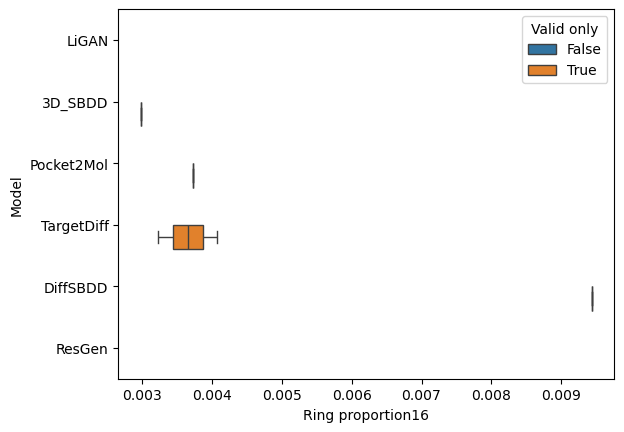

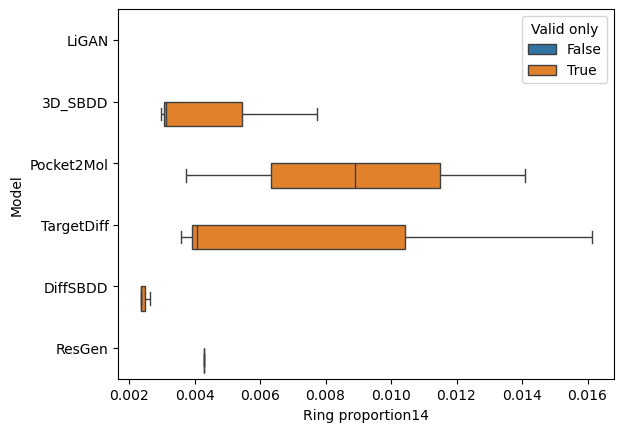

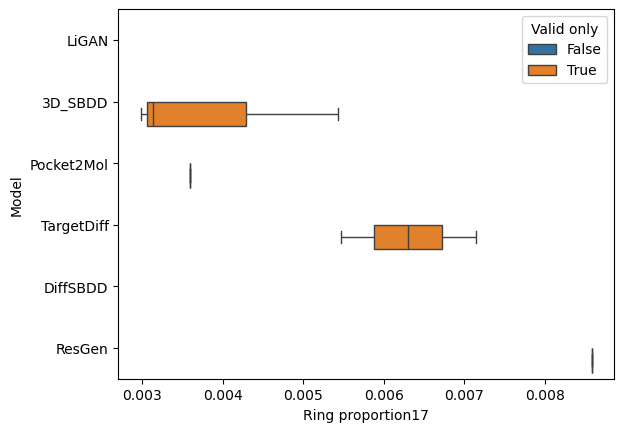

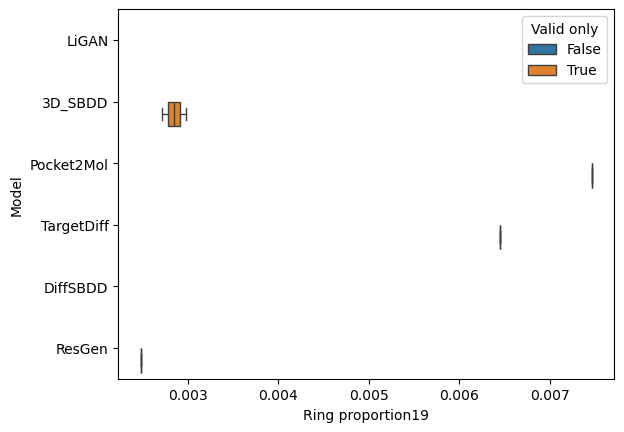

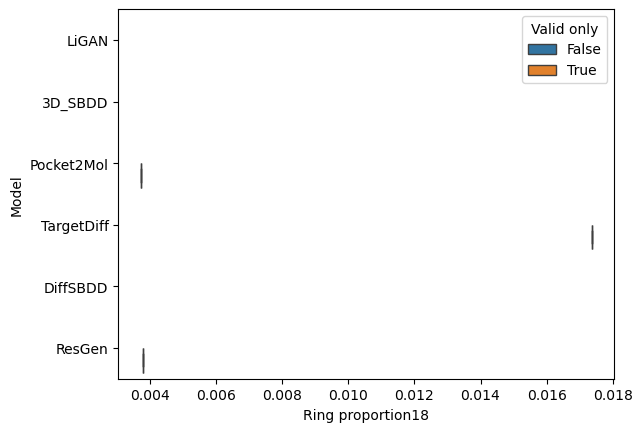

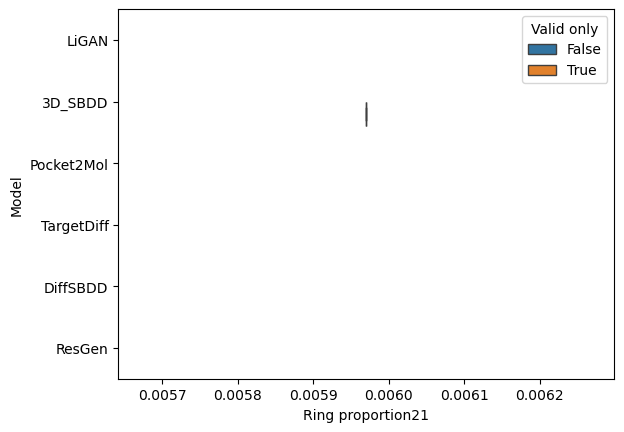

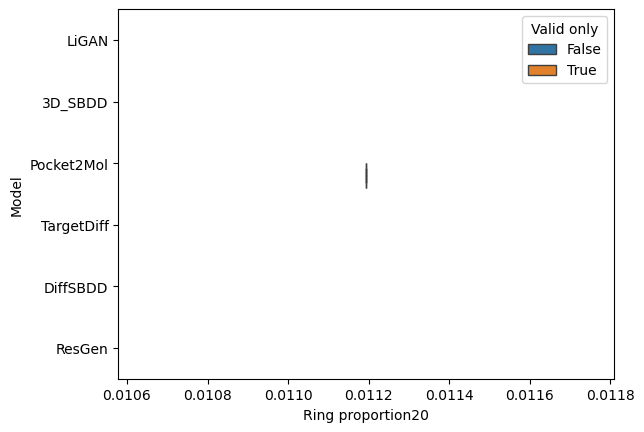

In [99]:
for column in df.columns[4:]:
    sns.boxplot(df2, x=column, hue='Valid only', y='Model')
    plt.show()

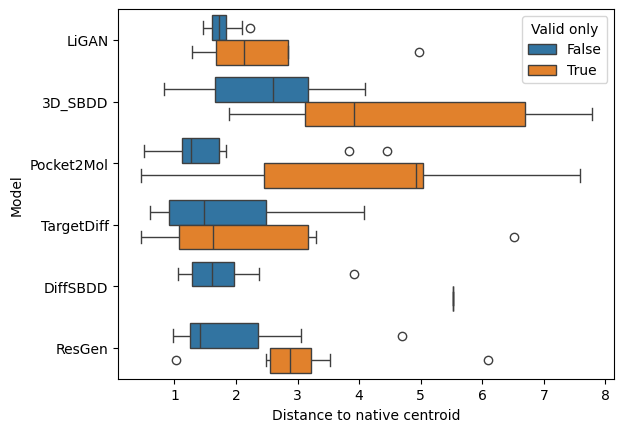

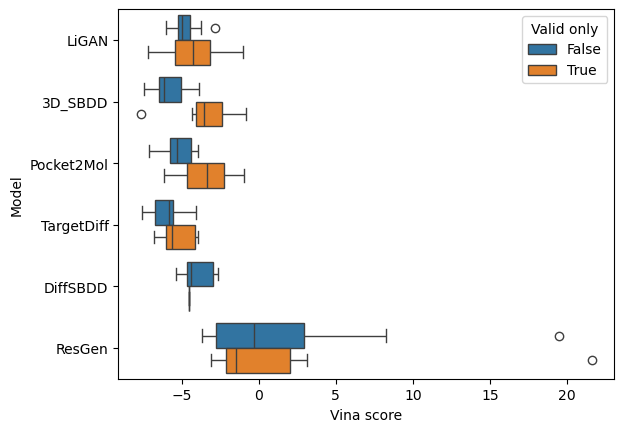

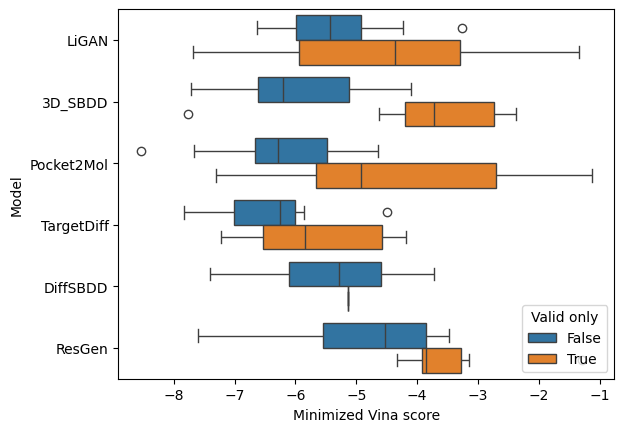

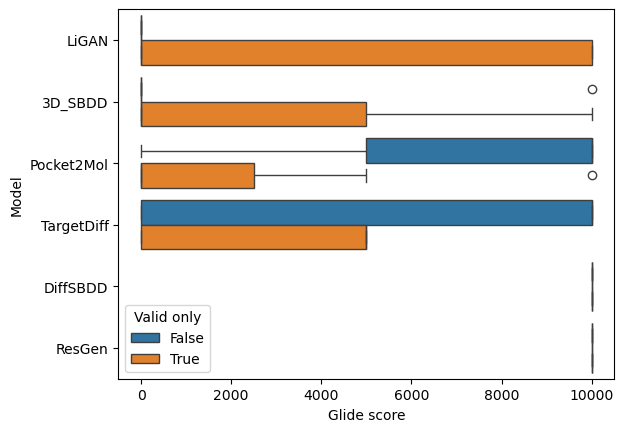

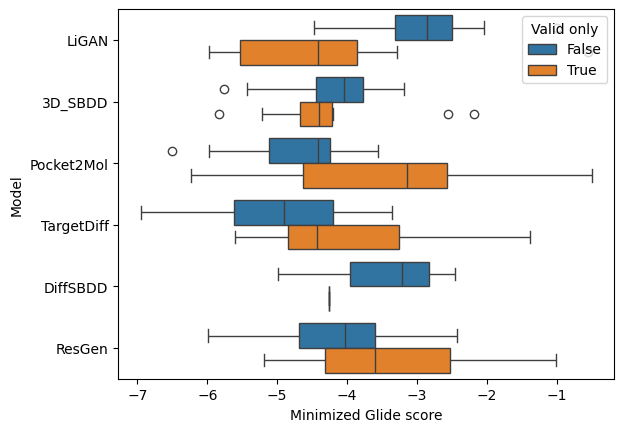

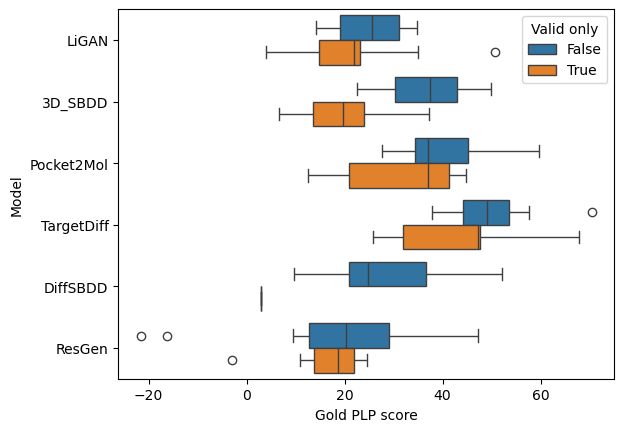

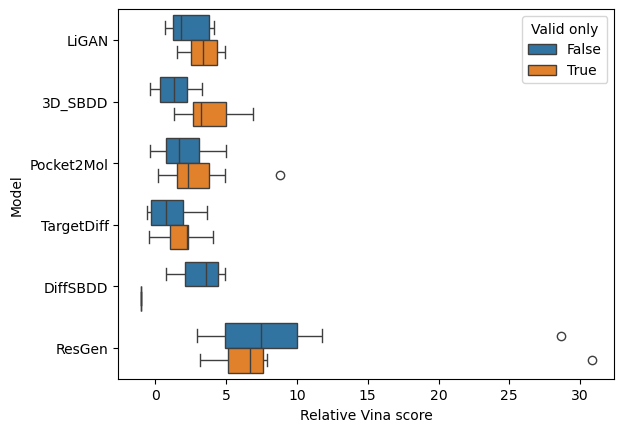

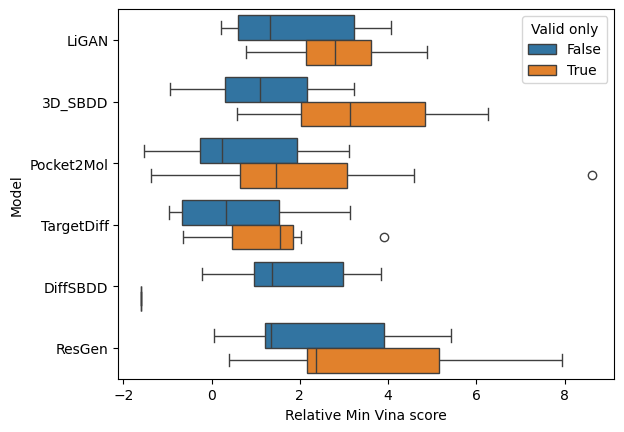

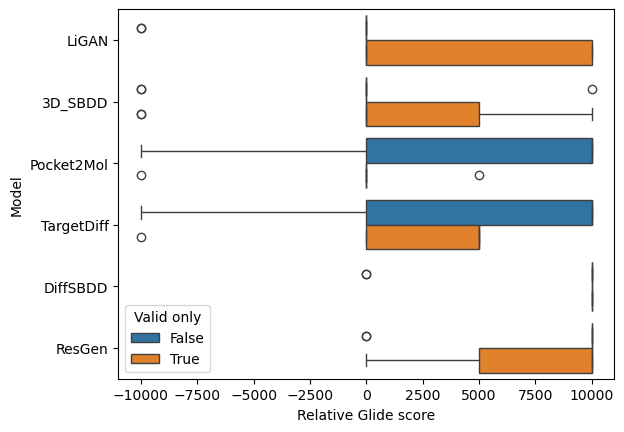

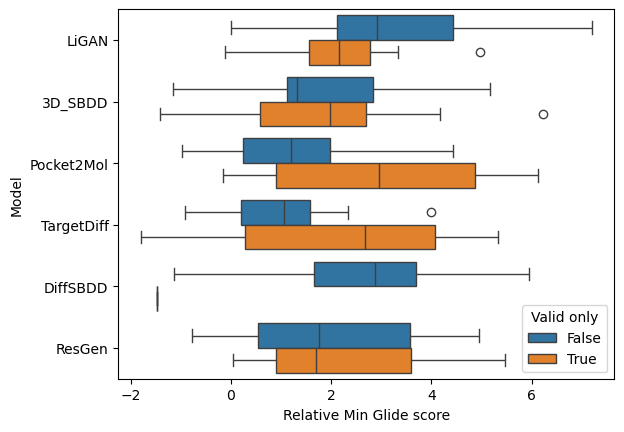

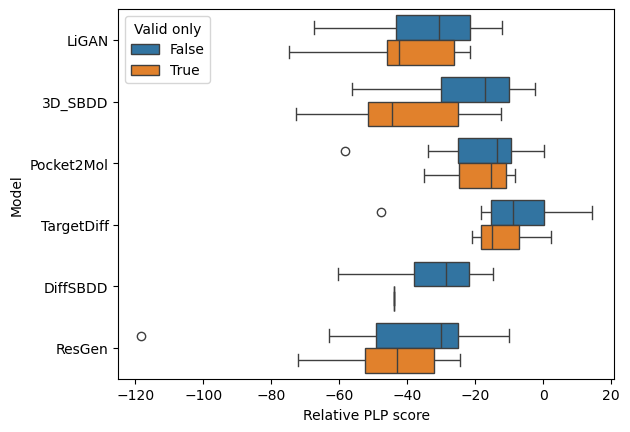

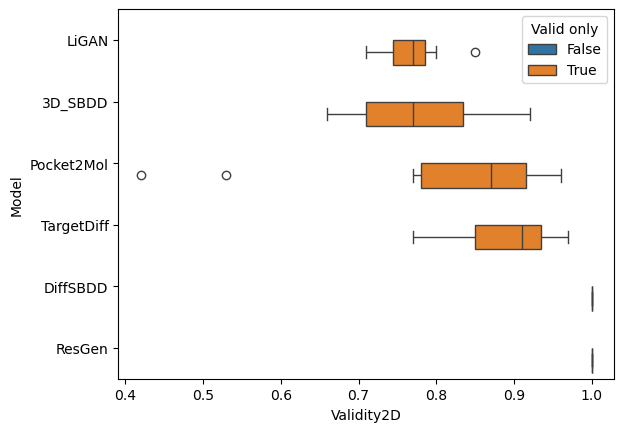

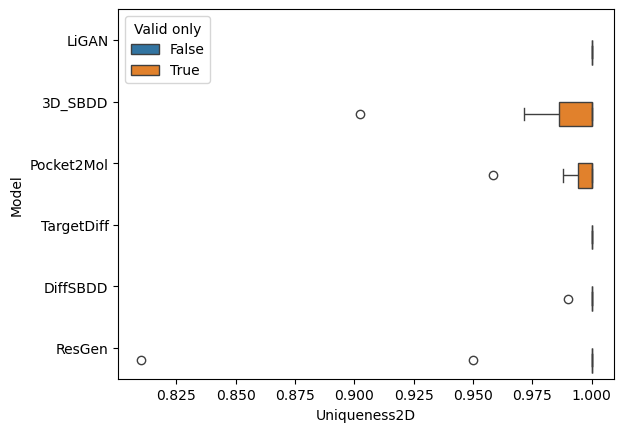

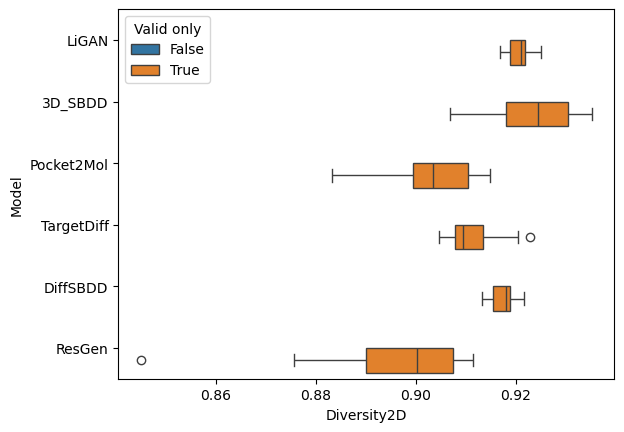

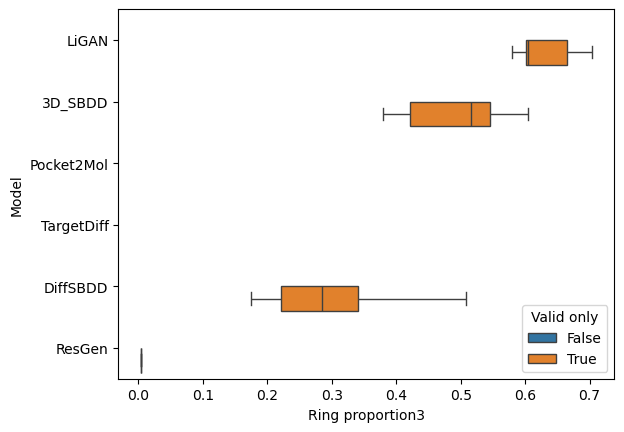

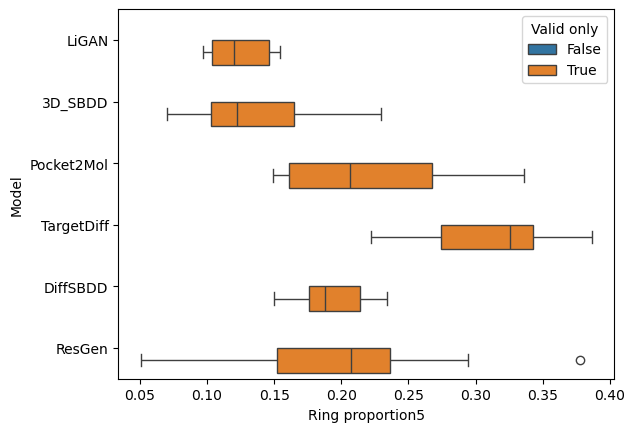

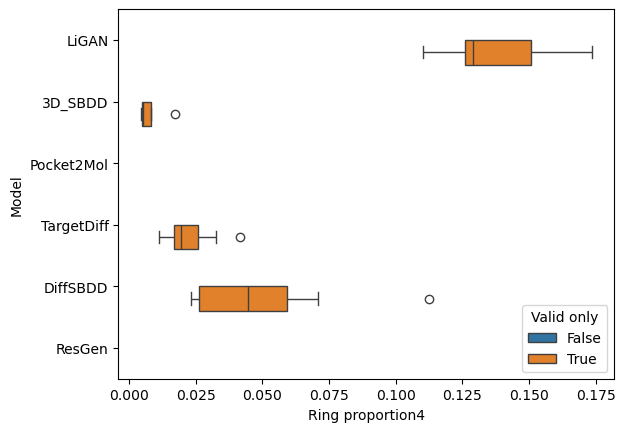

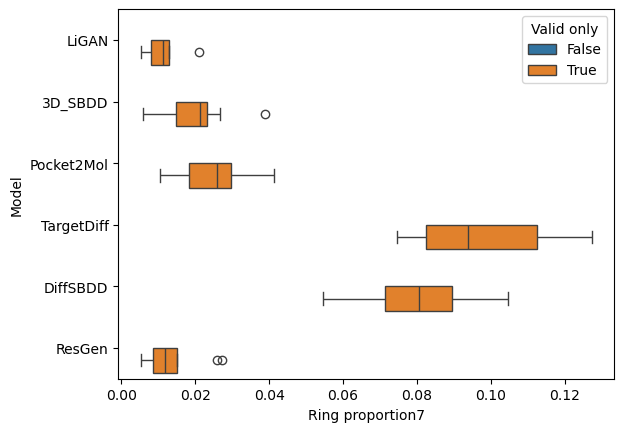

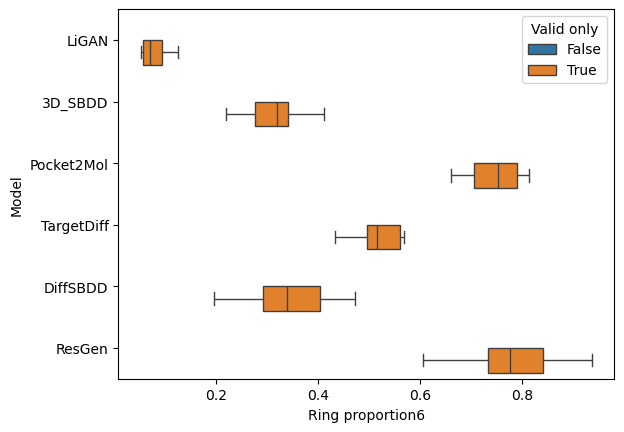

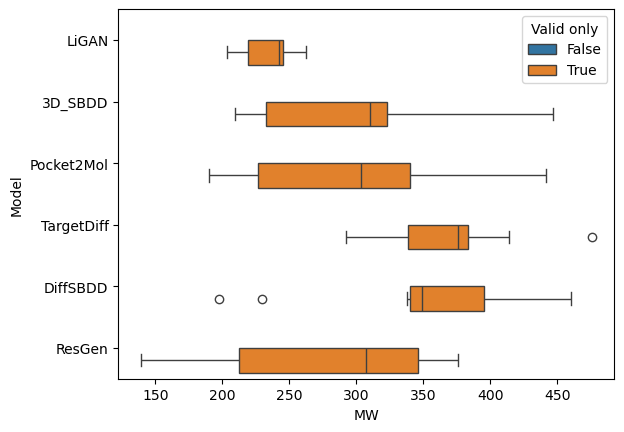

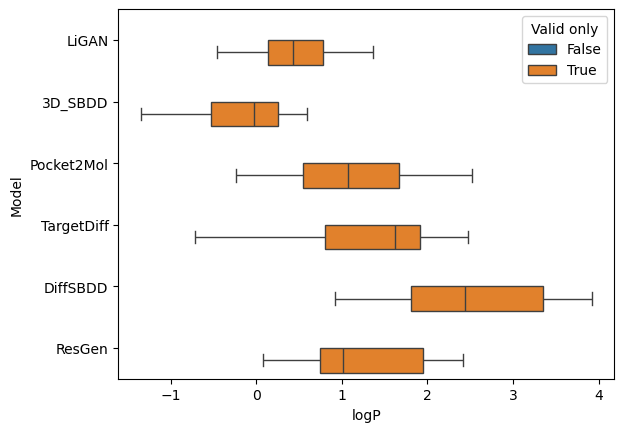

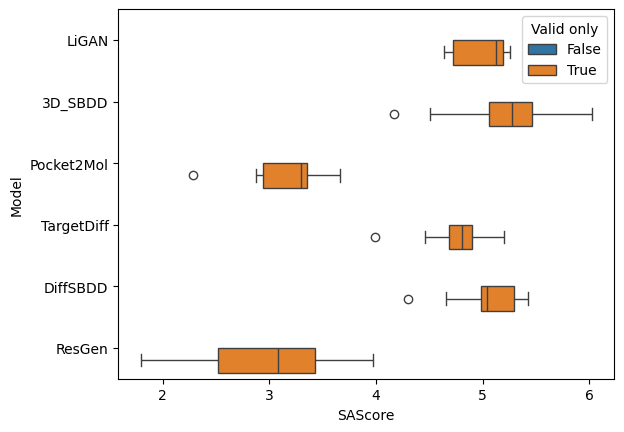

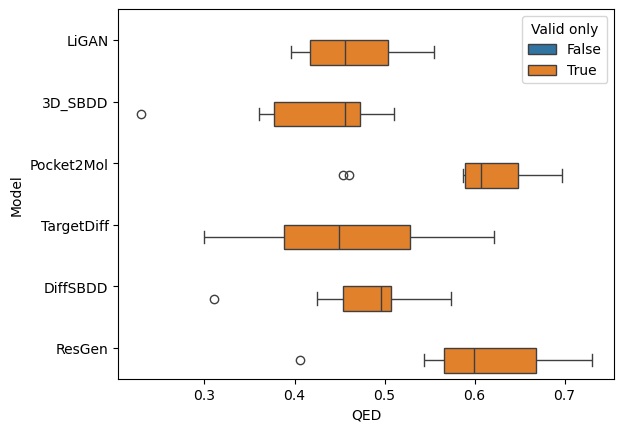

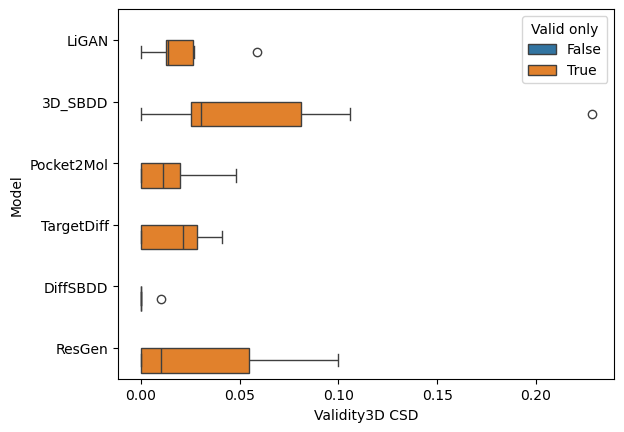

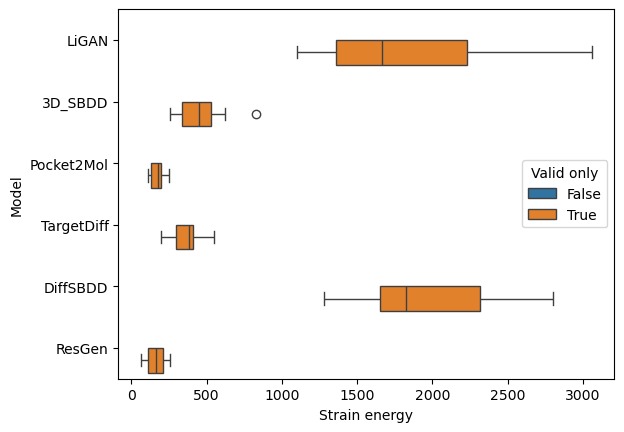

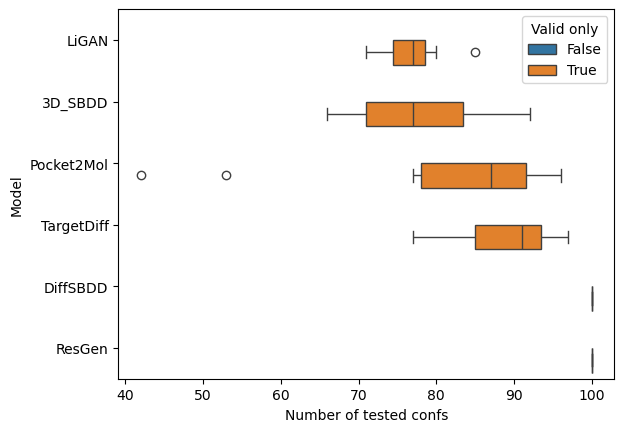

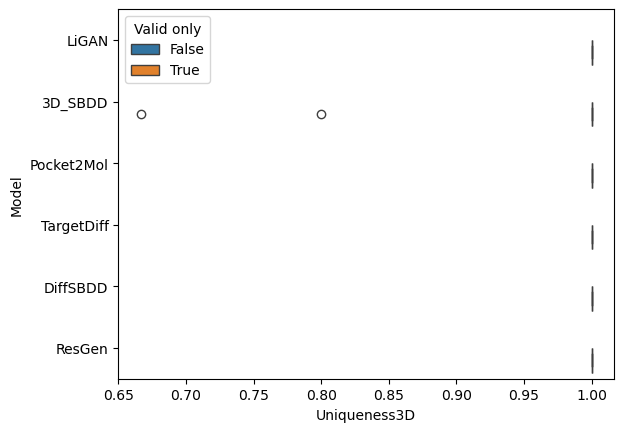

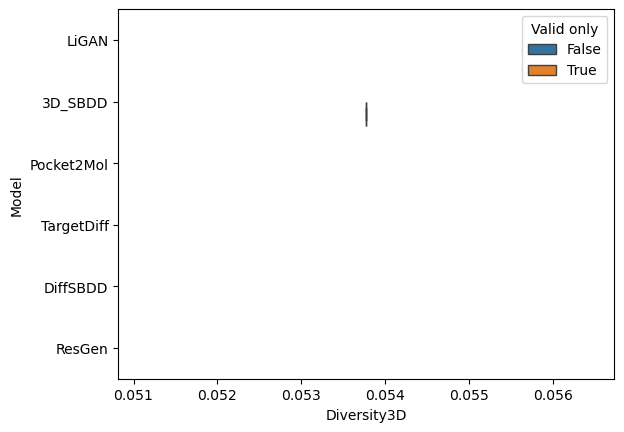

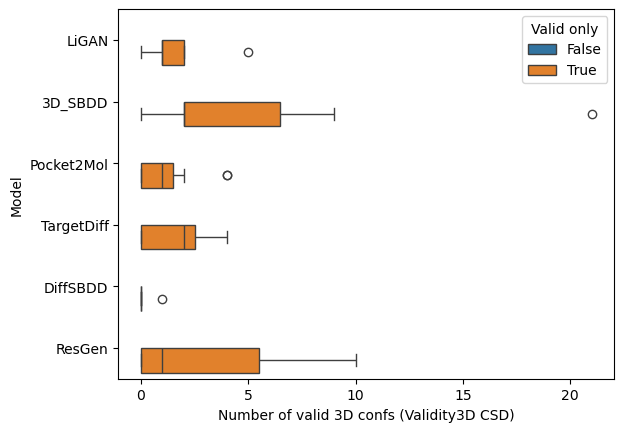

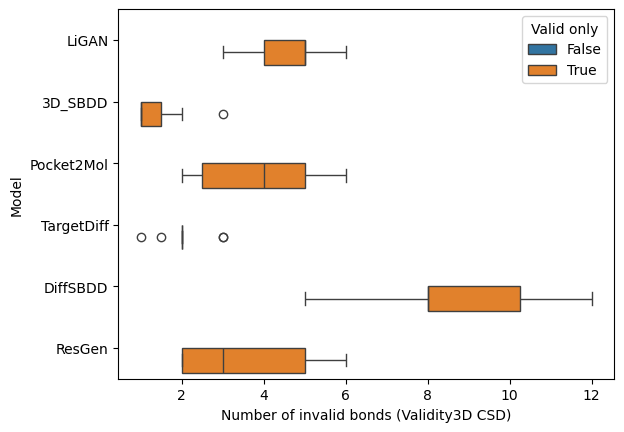

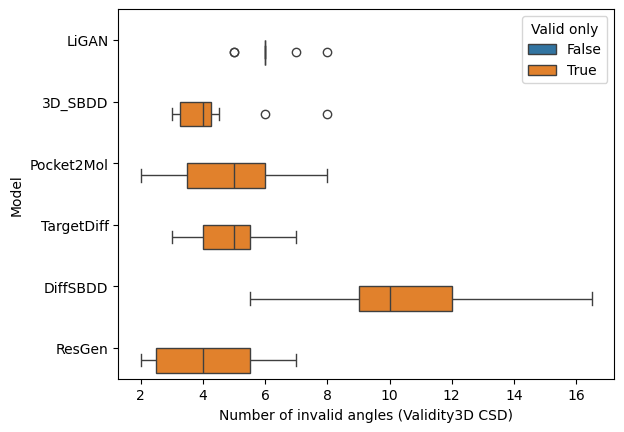

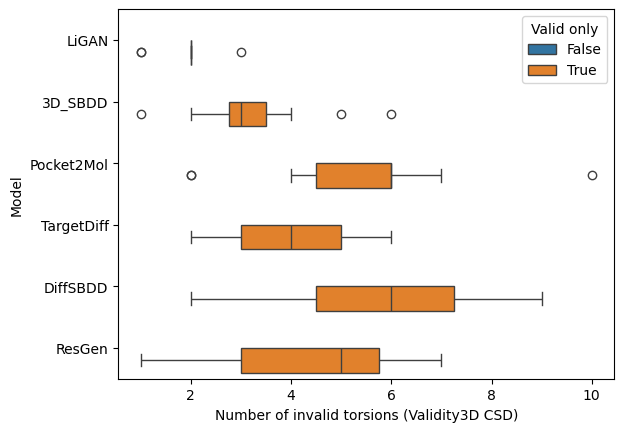

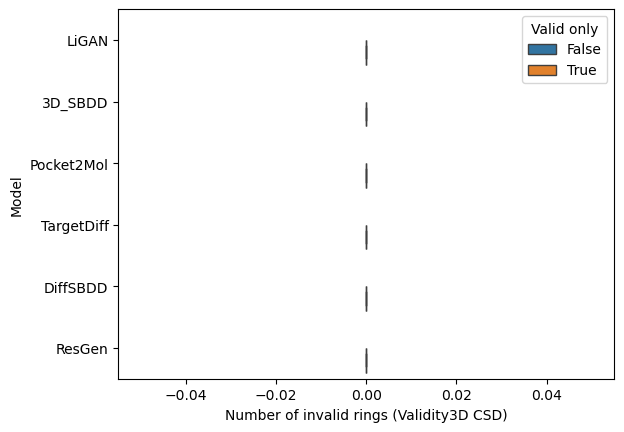

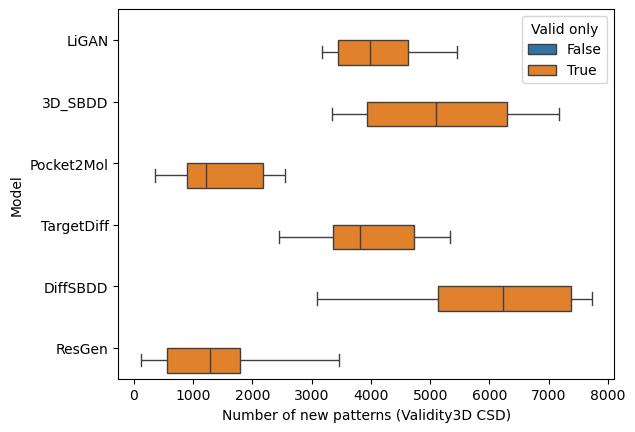

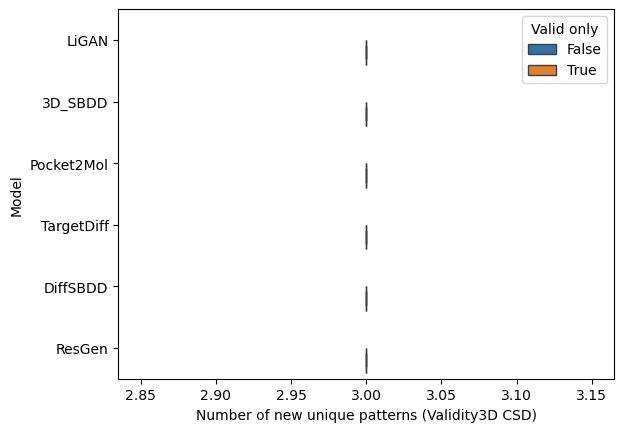

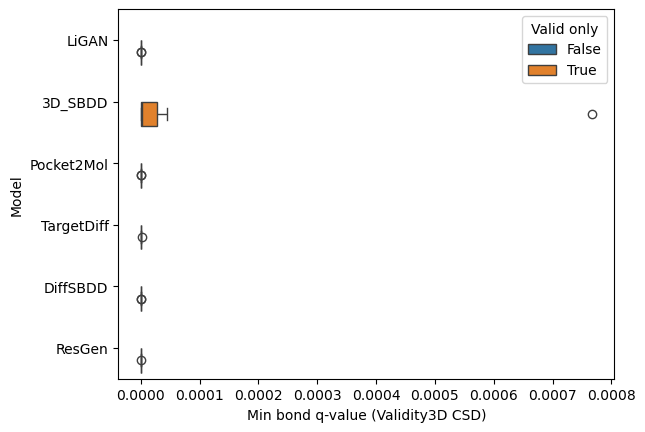

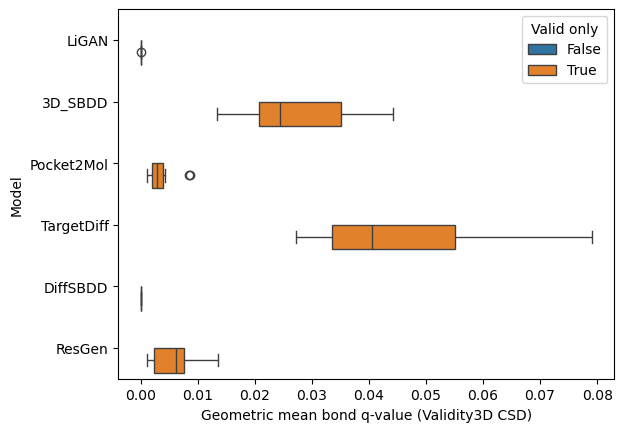

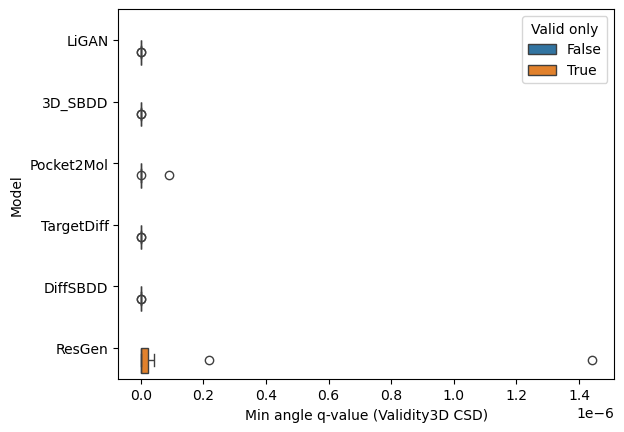

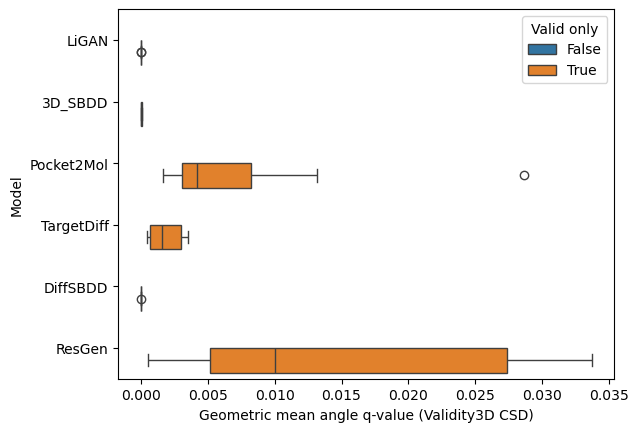

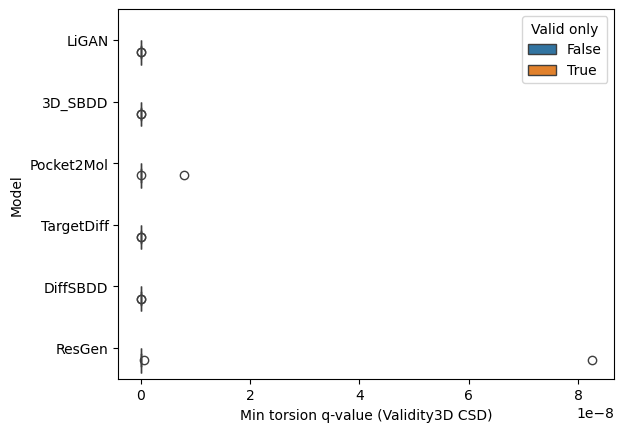

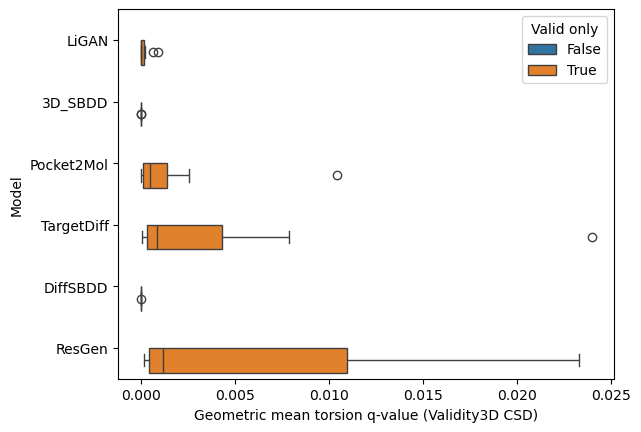

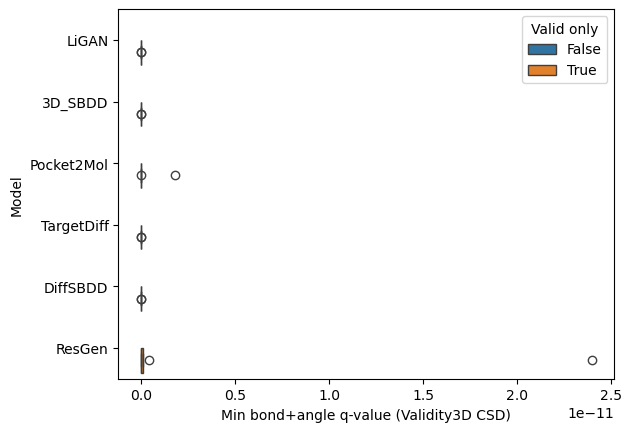

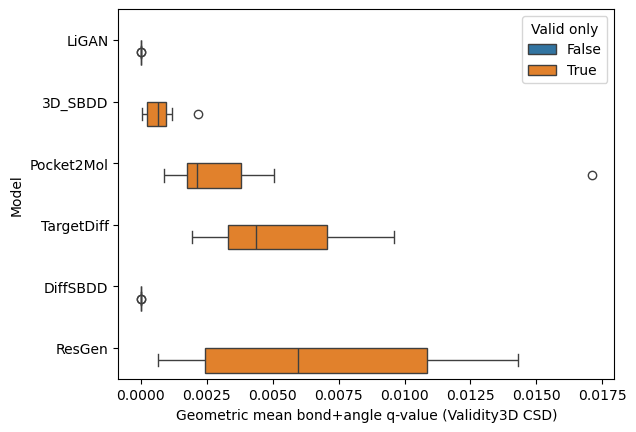

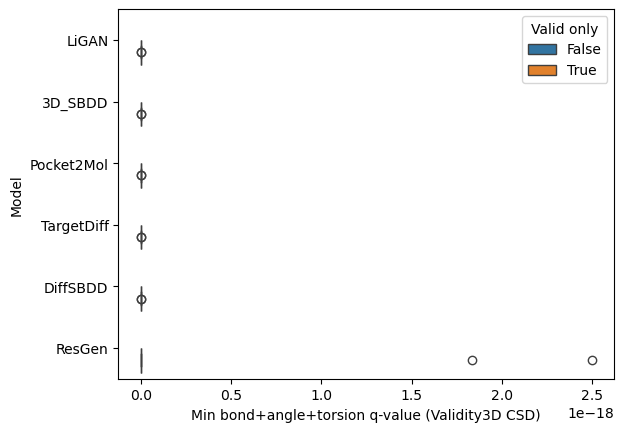

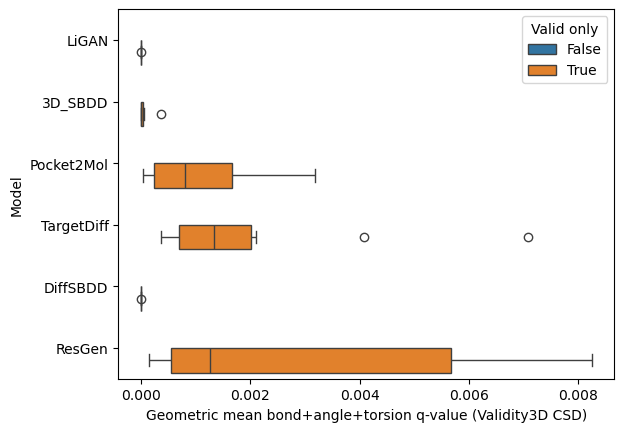

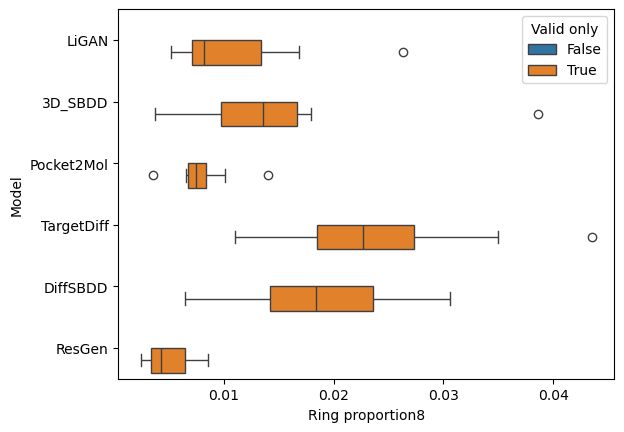

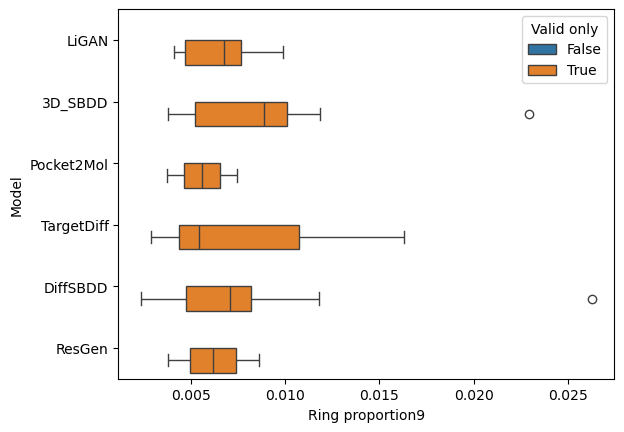

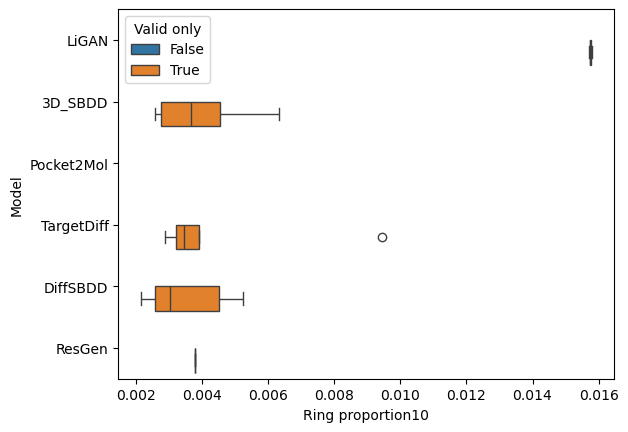

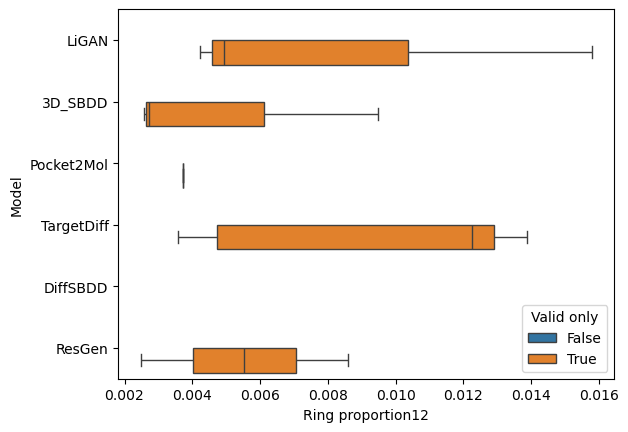

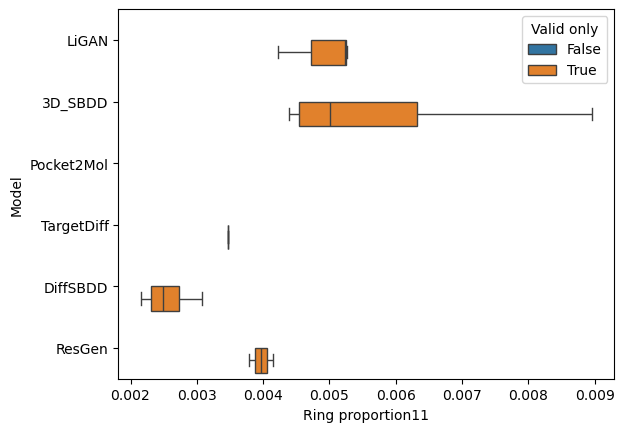

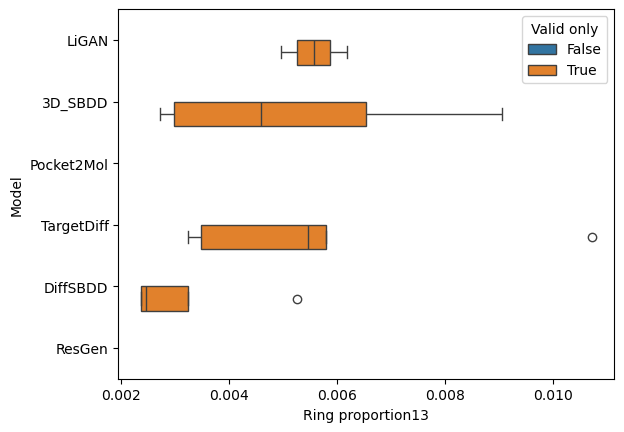

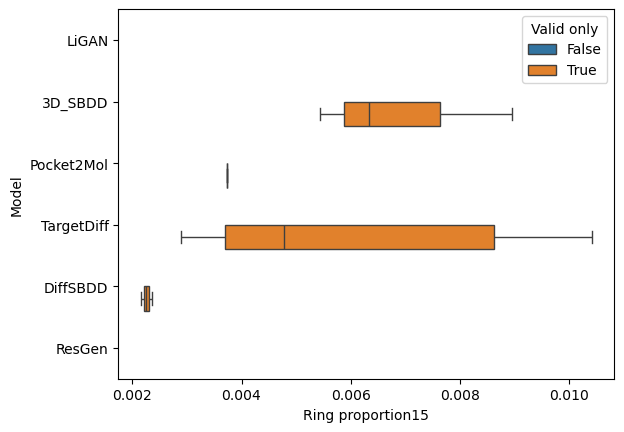

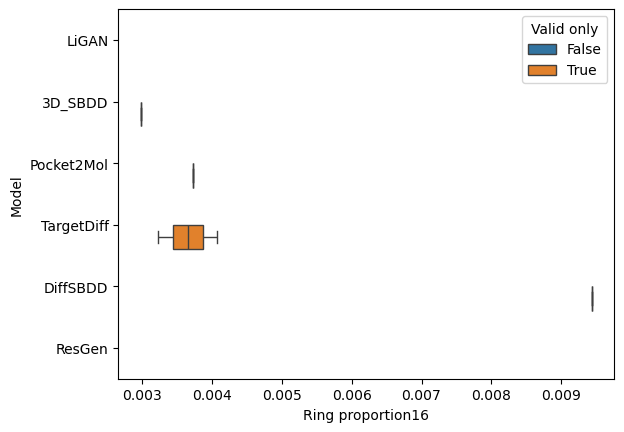

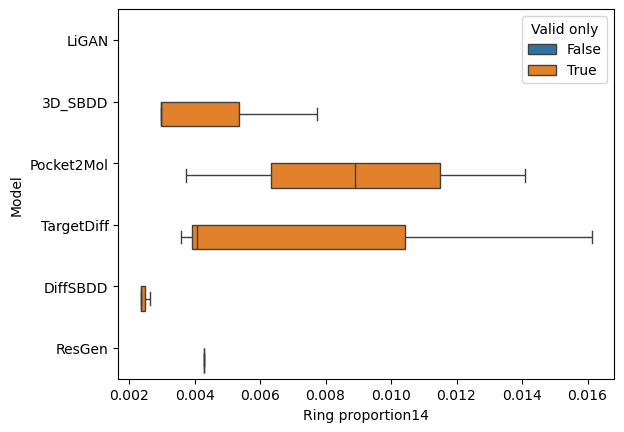

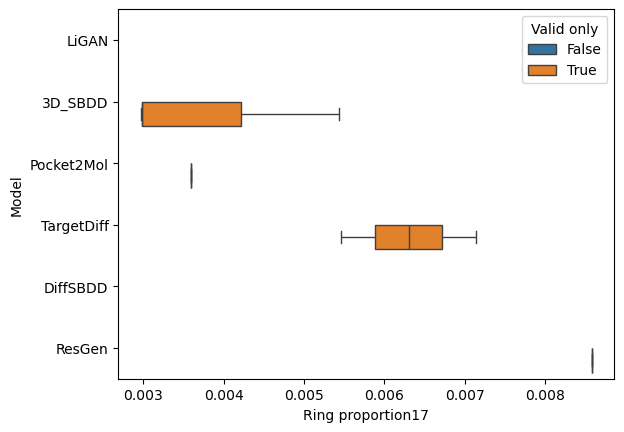

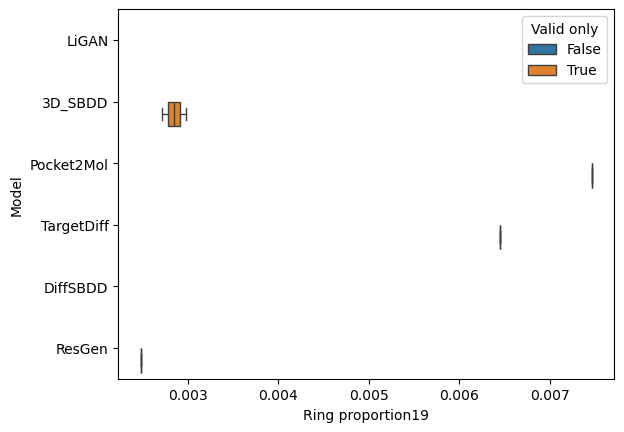

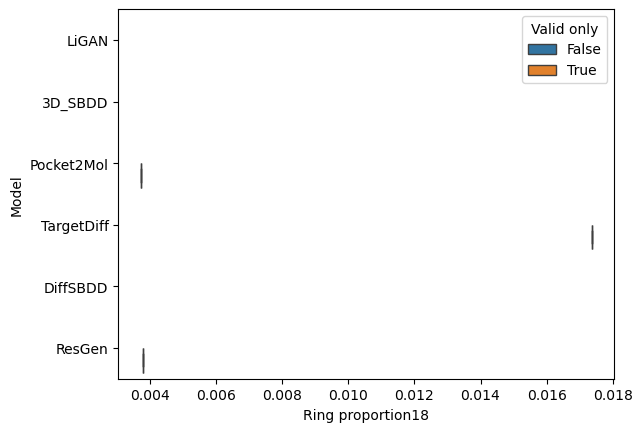

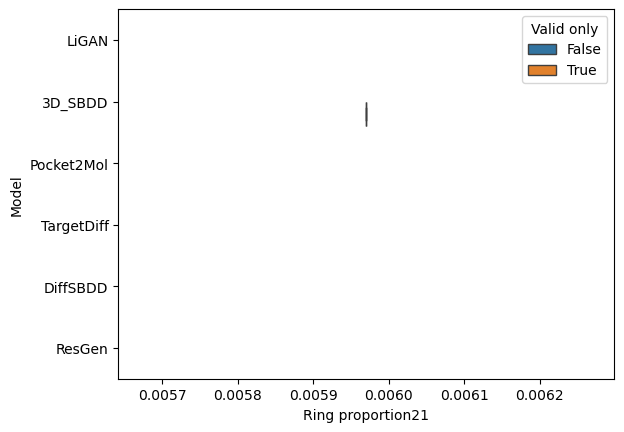

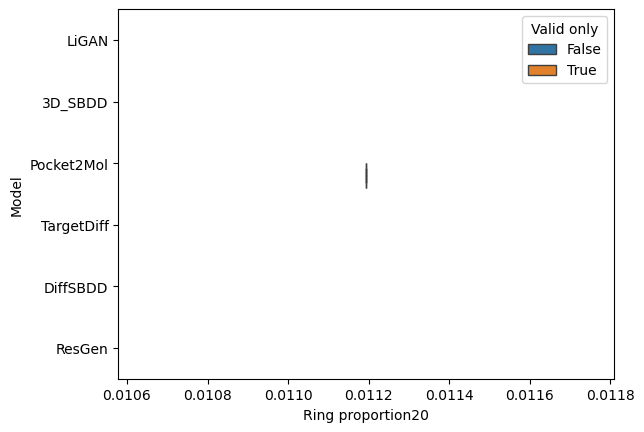

In [95]:
for column in df.columns[4:]:
    sns.boxplot(df[~df['Minimized']], x=column, hue='Valid only', y='Model')
    plt.show()

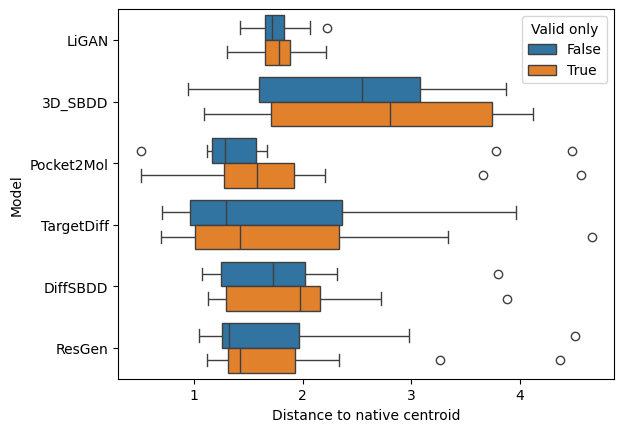

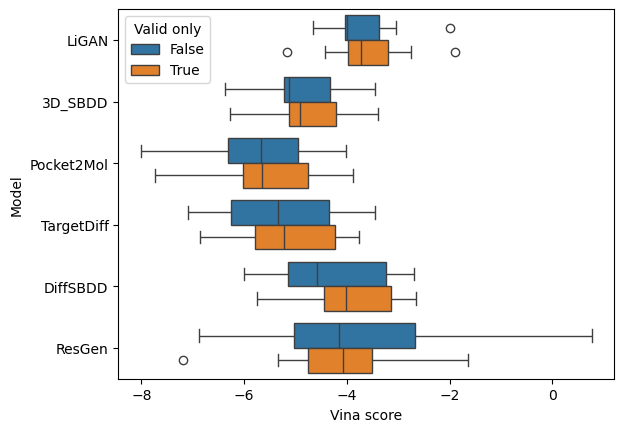

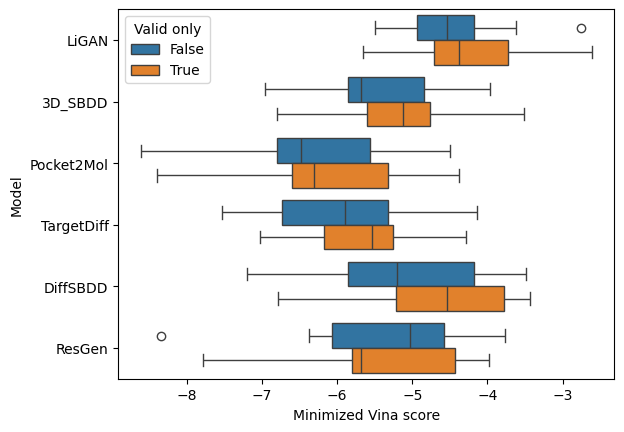

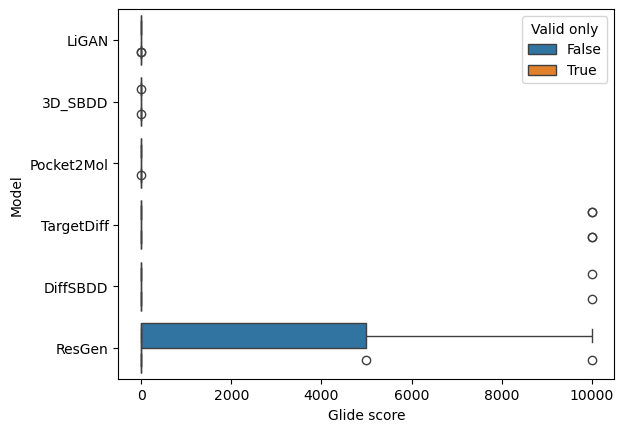

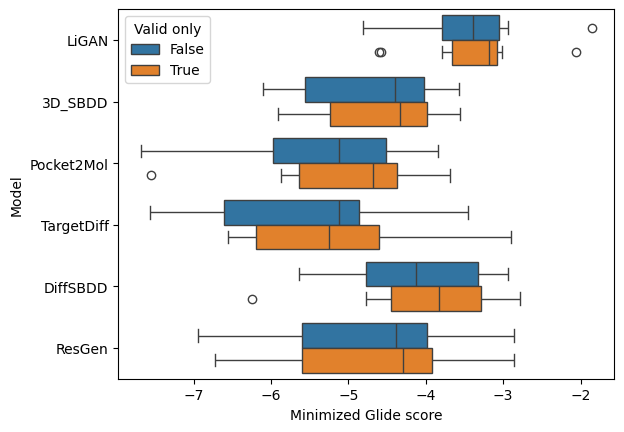

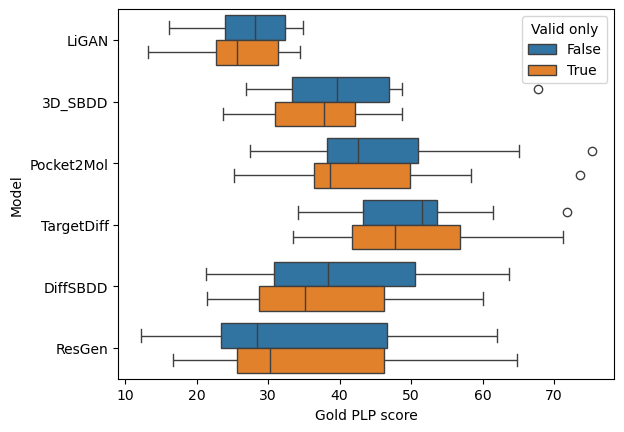

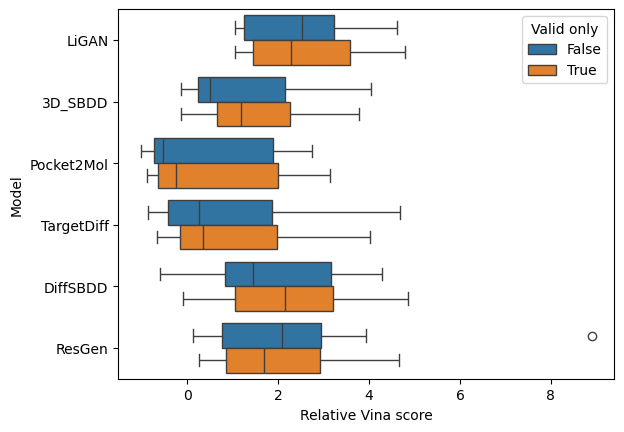

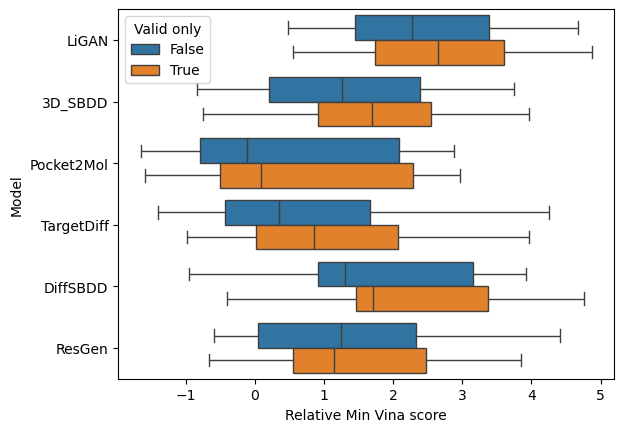

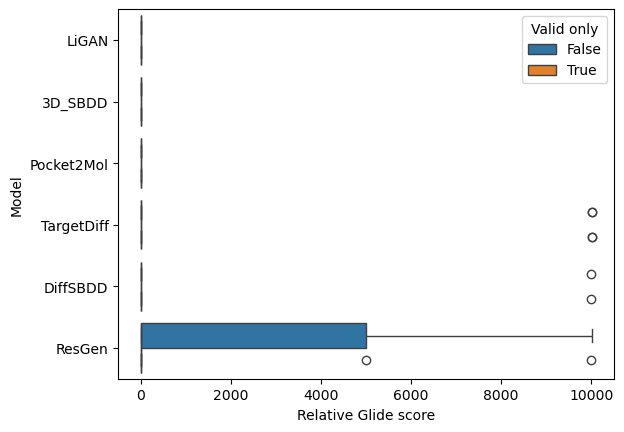

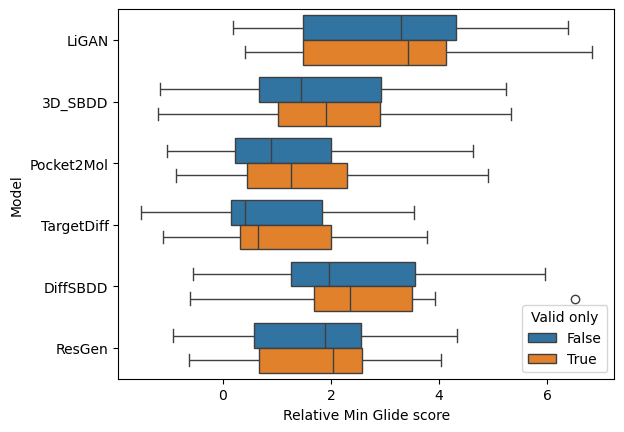

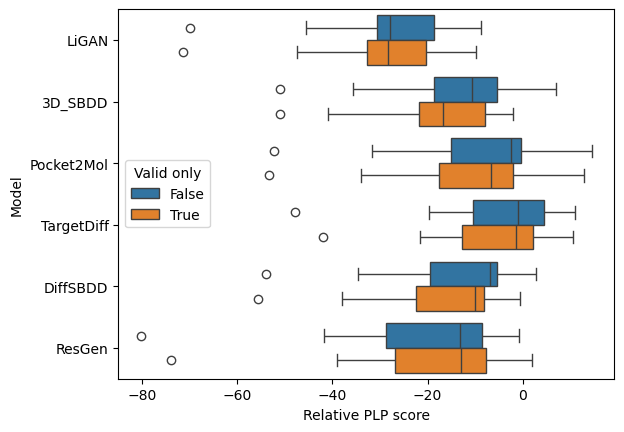

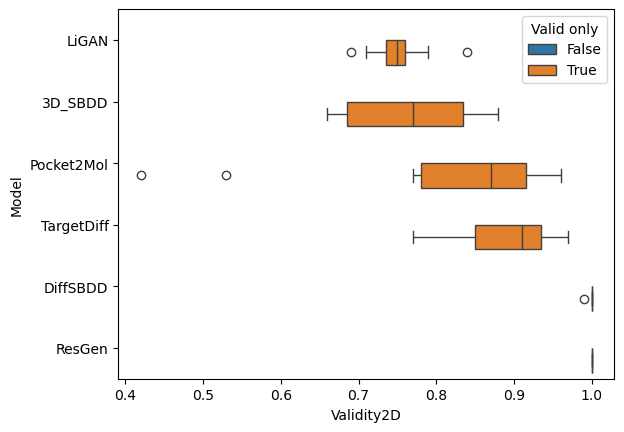

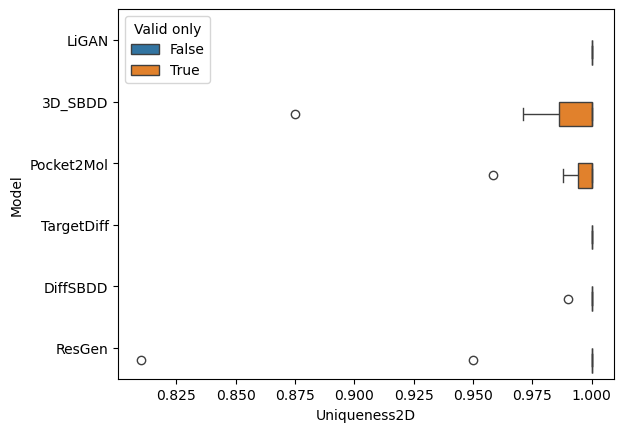

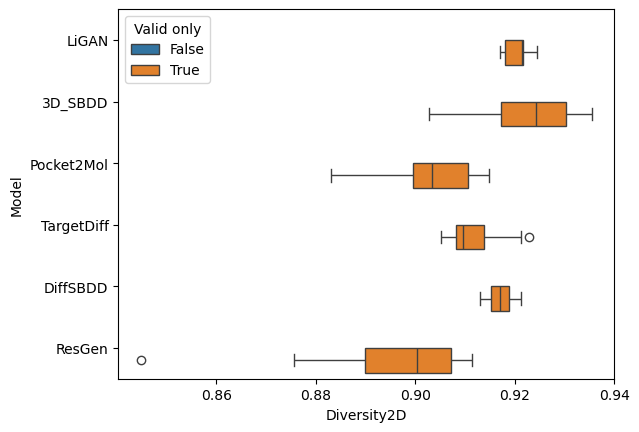

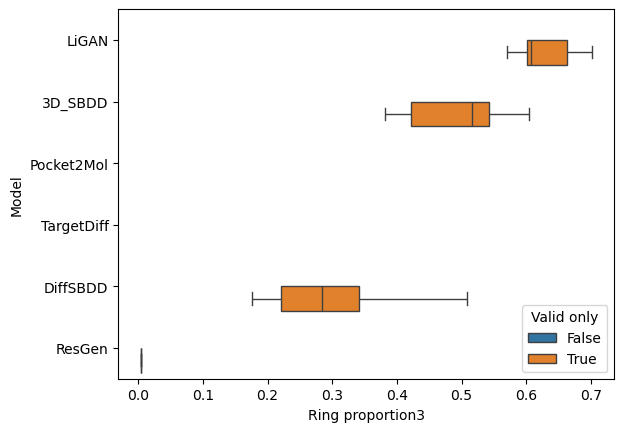

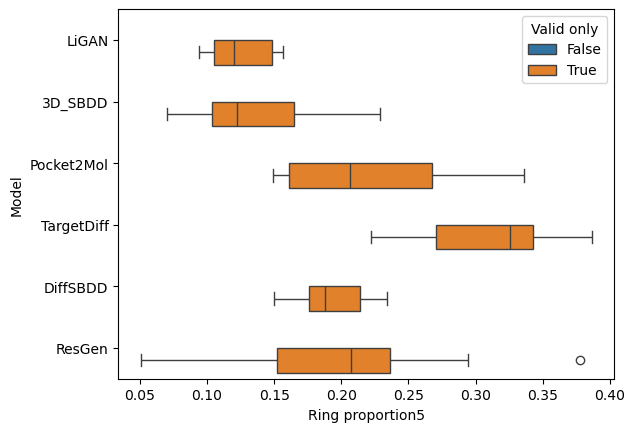

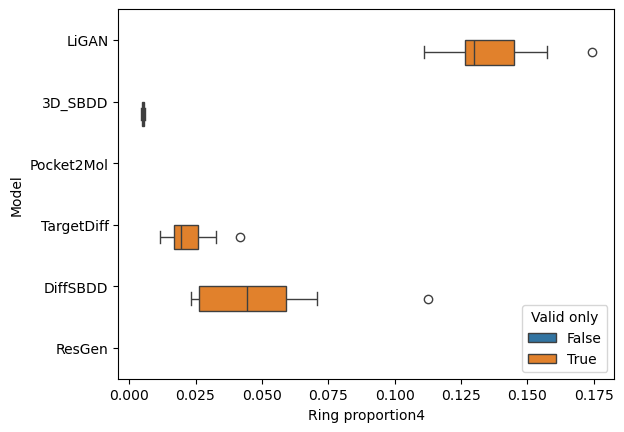

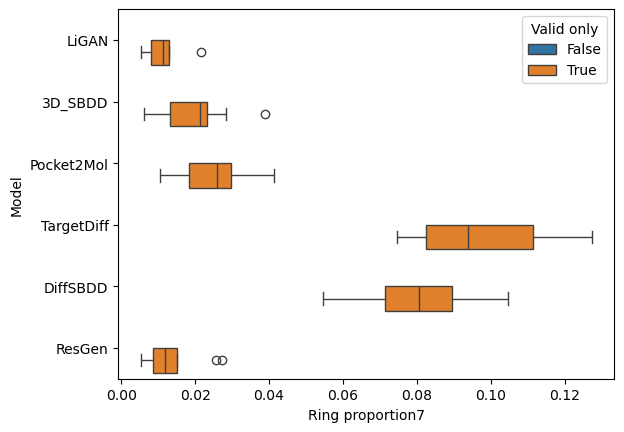

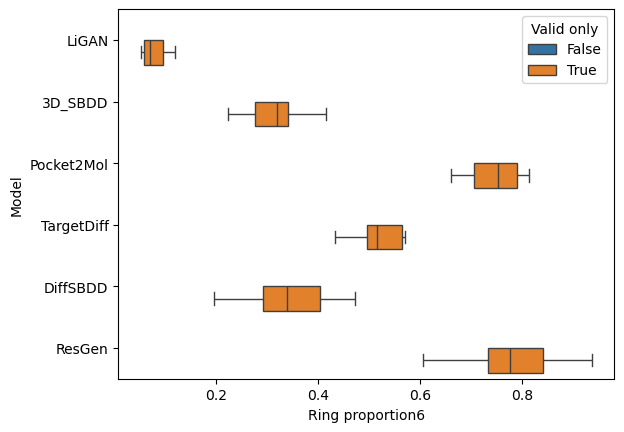

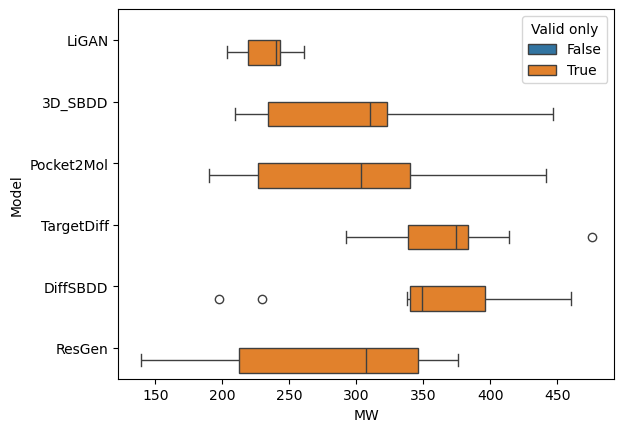

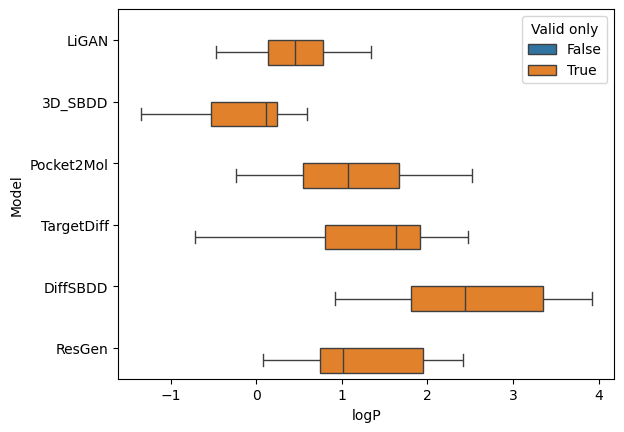

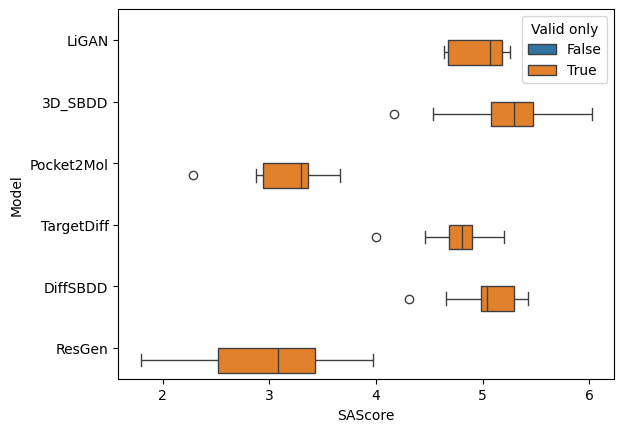

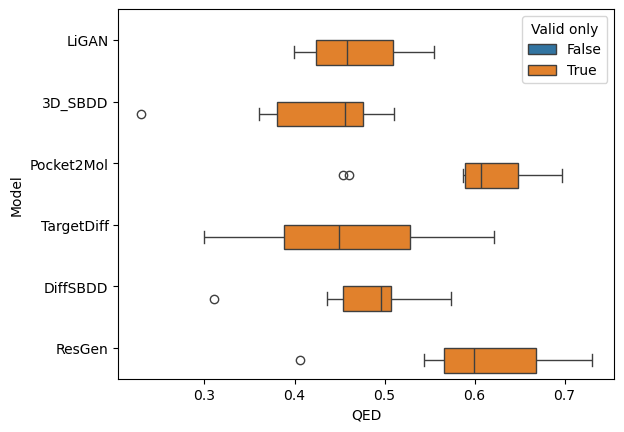

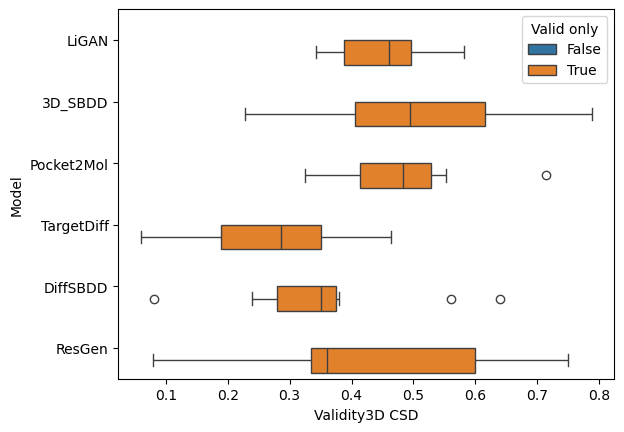

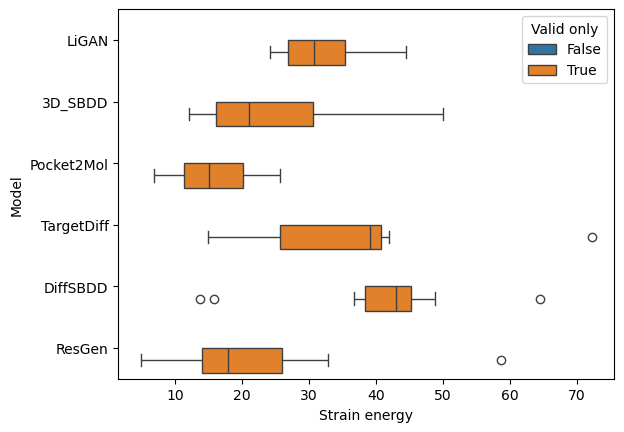

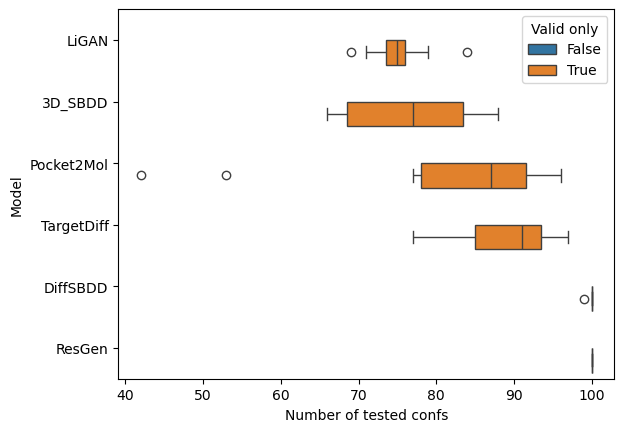

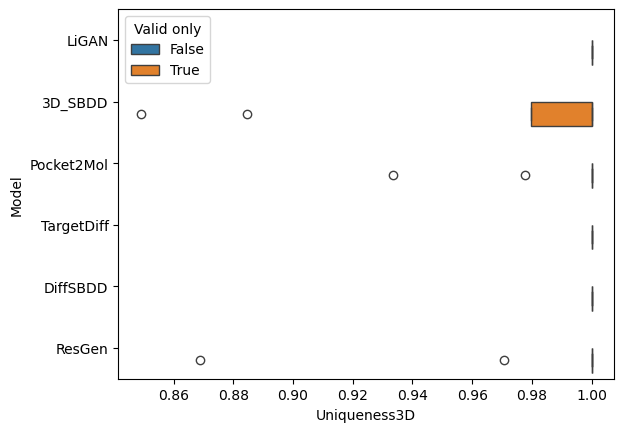

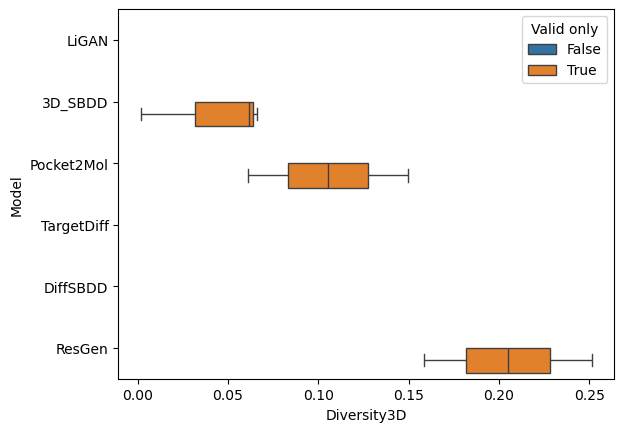

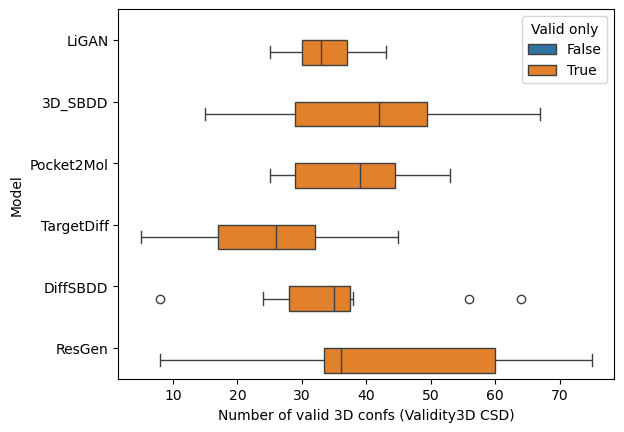

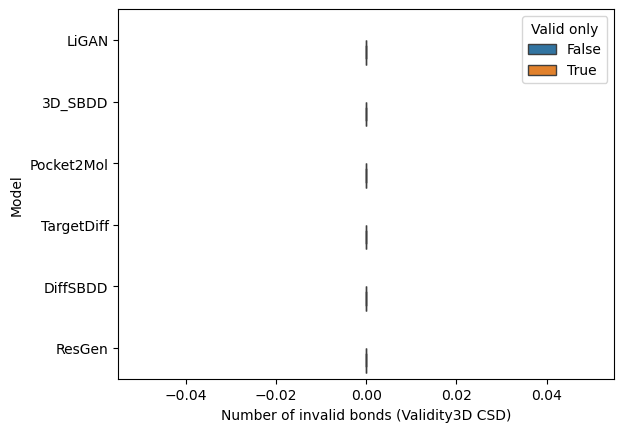

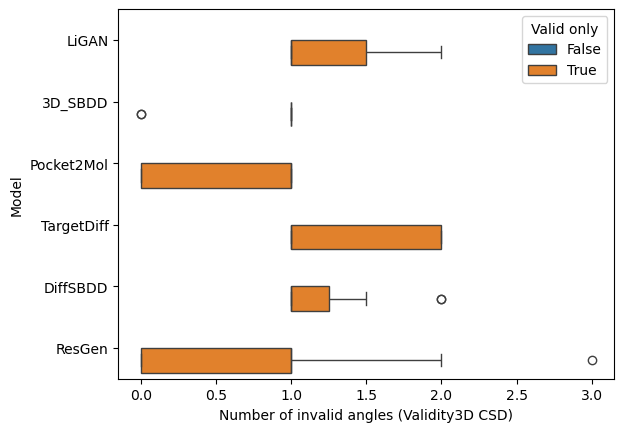

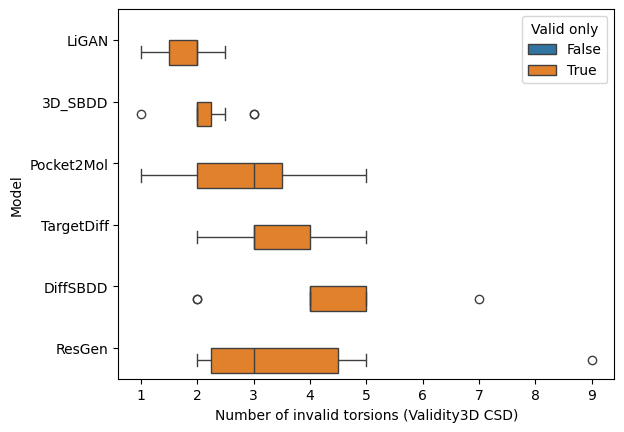

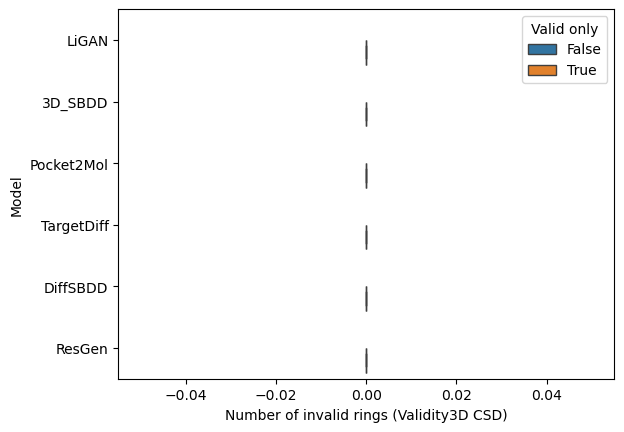

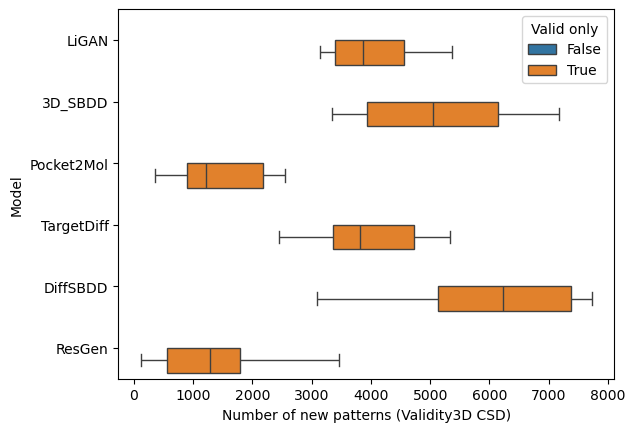

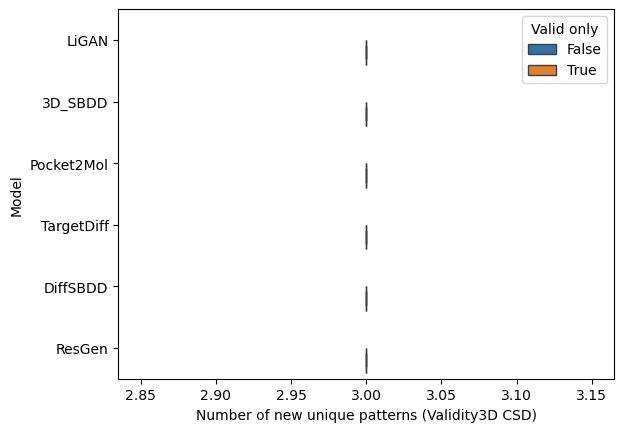

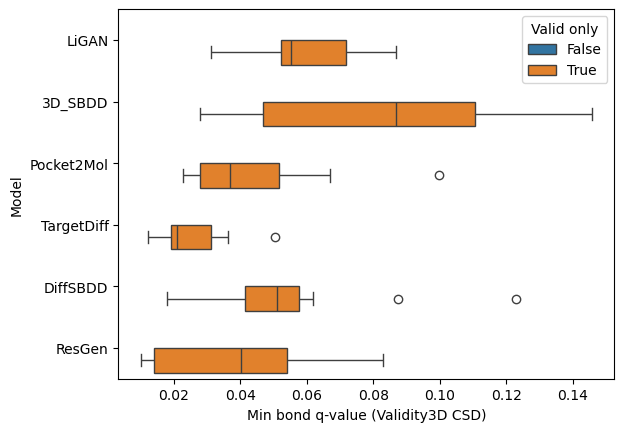

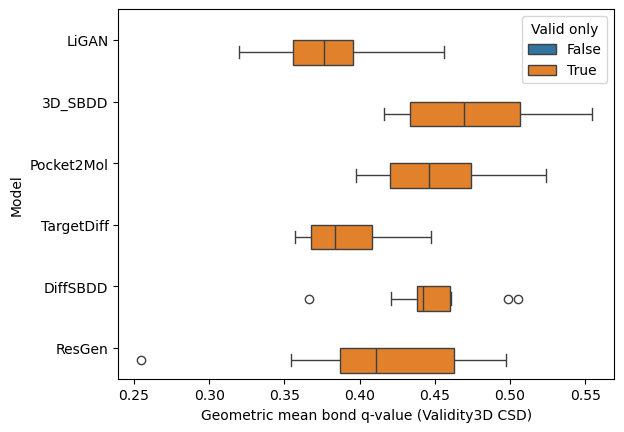

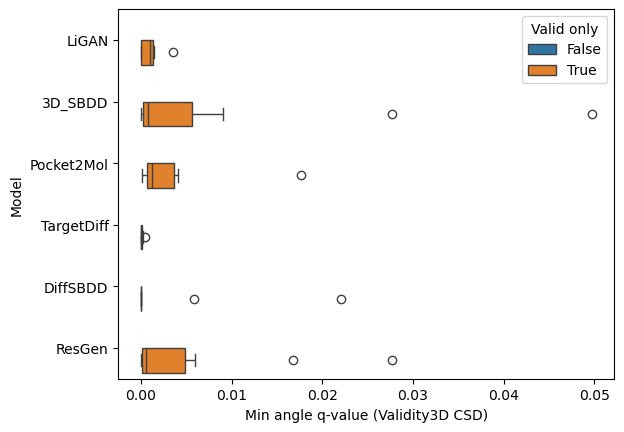

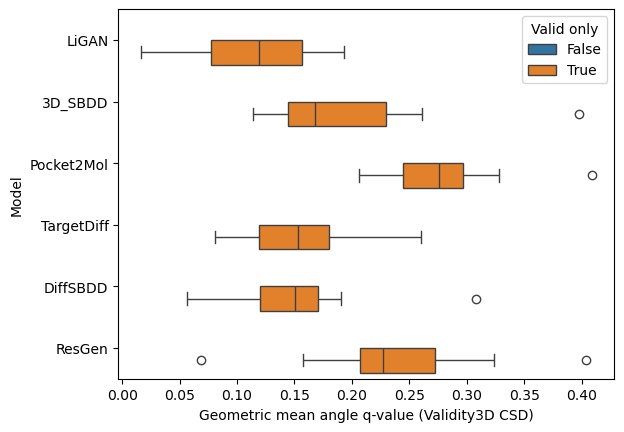

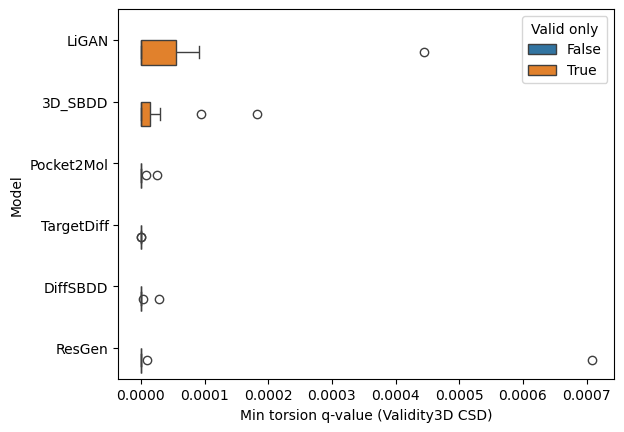

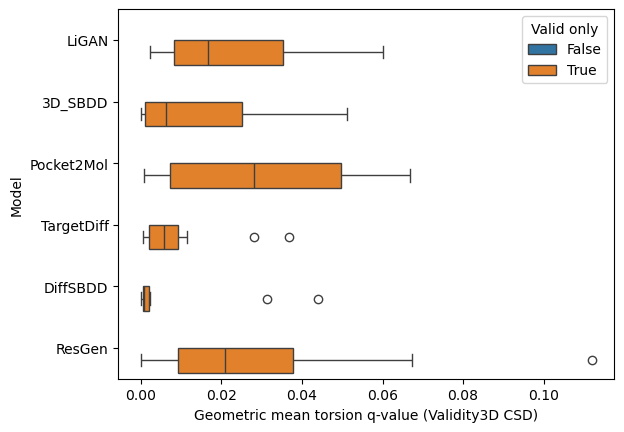

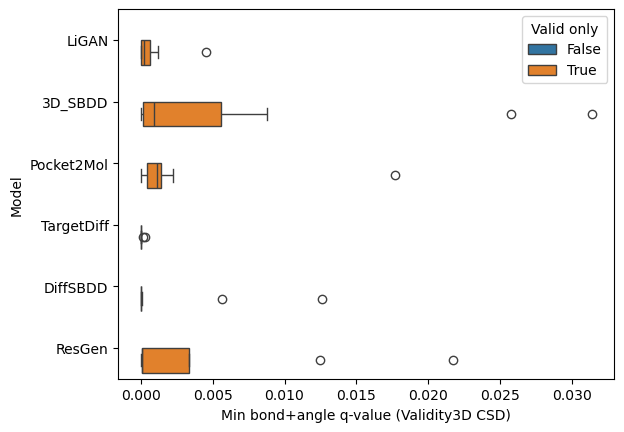

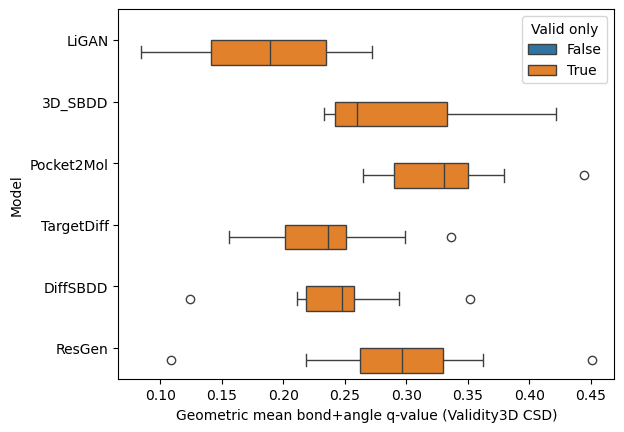

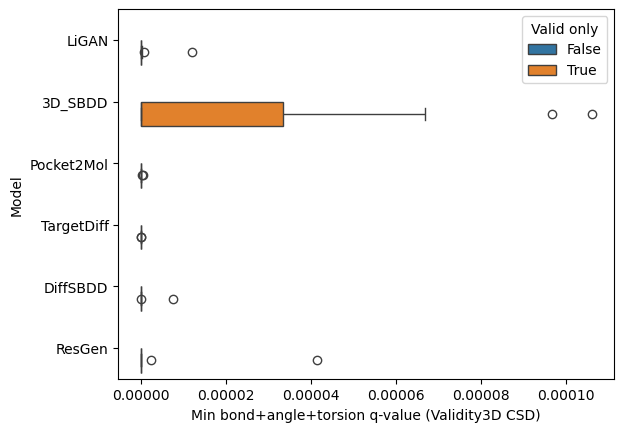

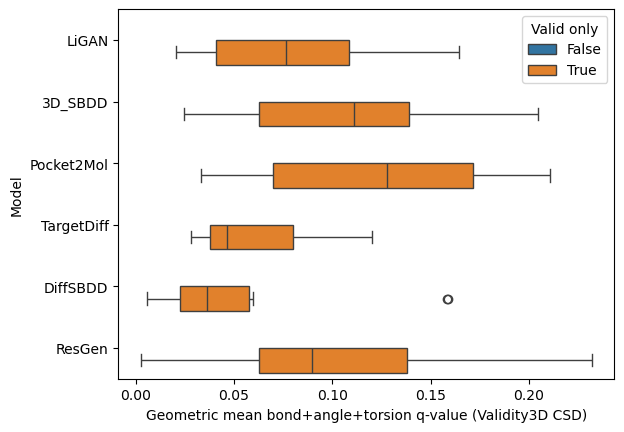

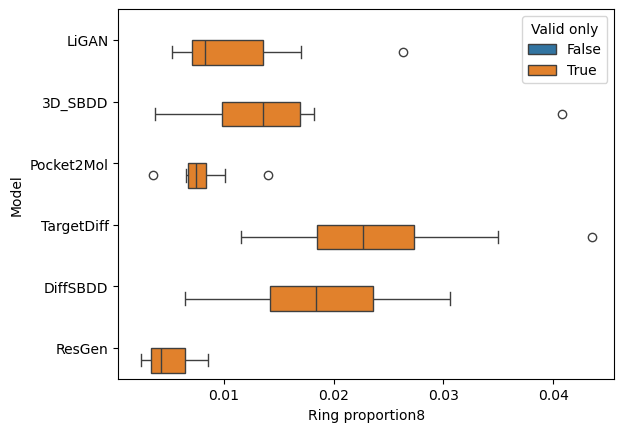

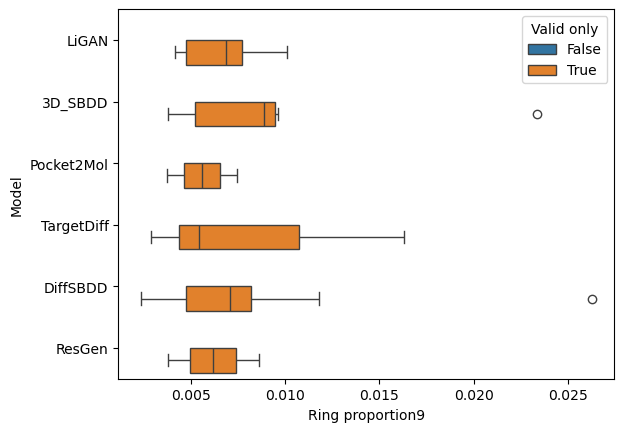

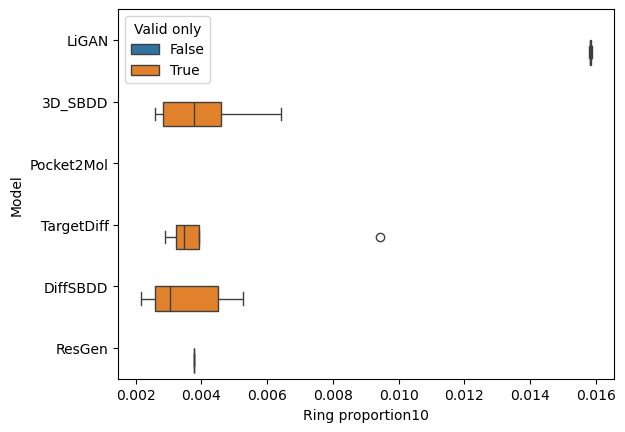

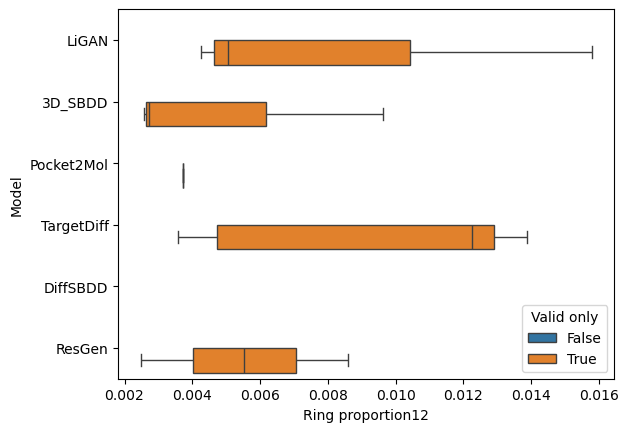

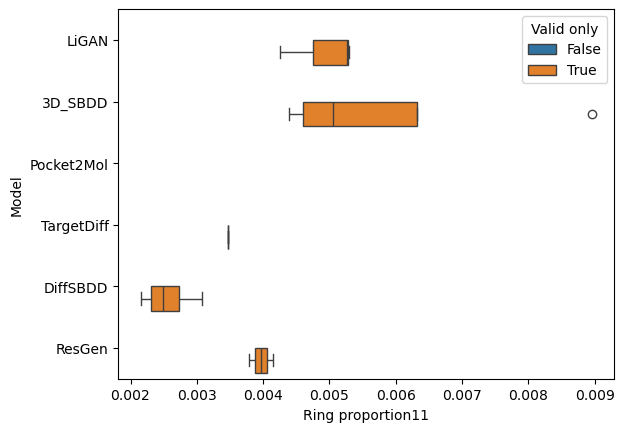

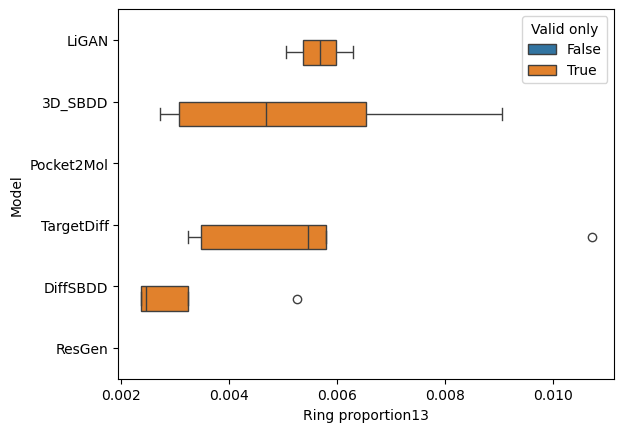

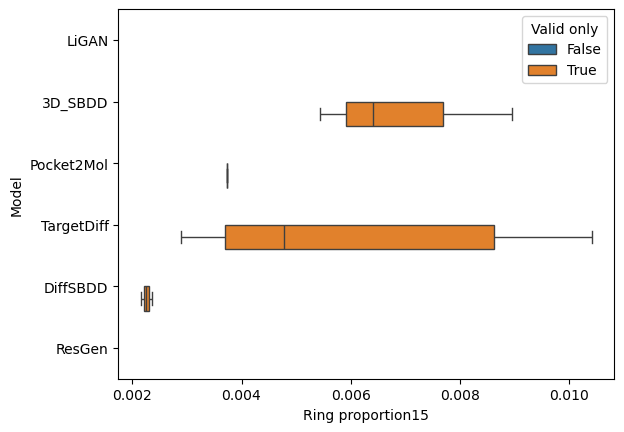

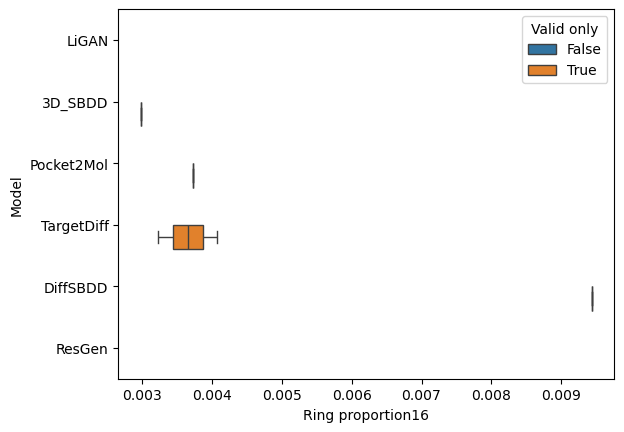

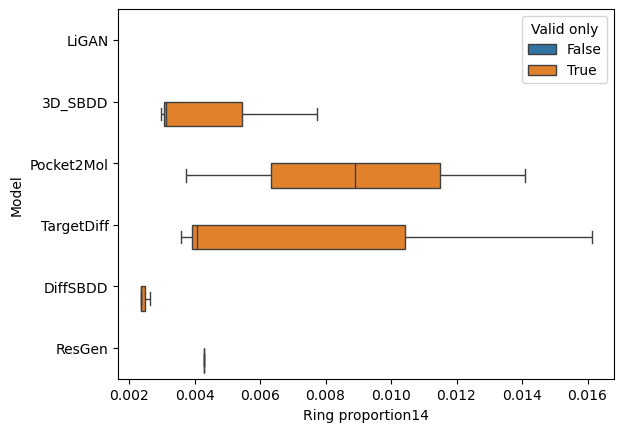

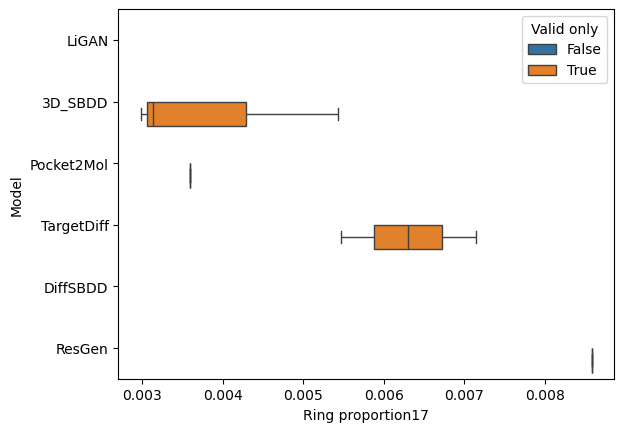

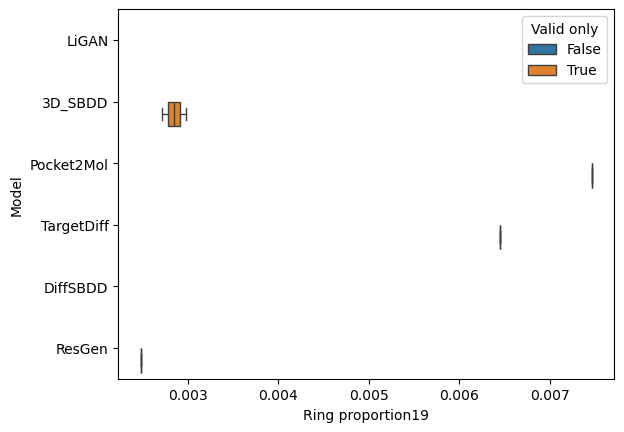

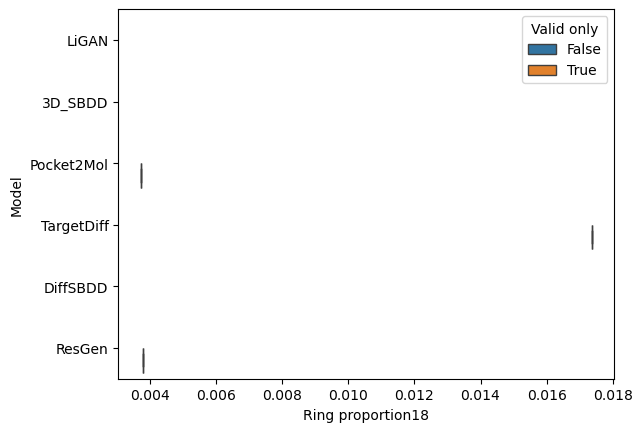

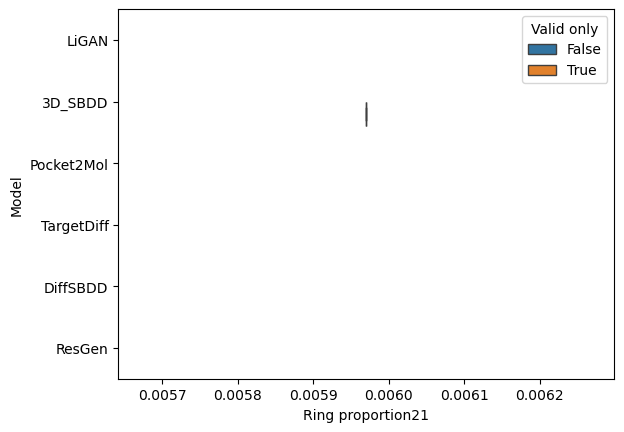

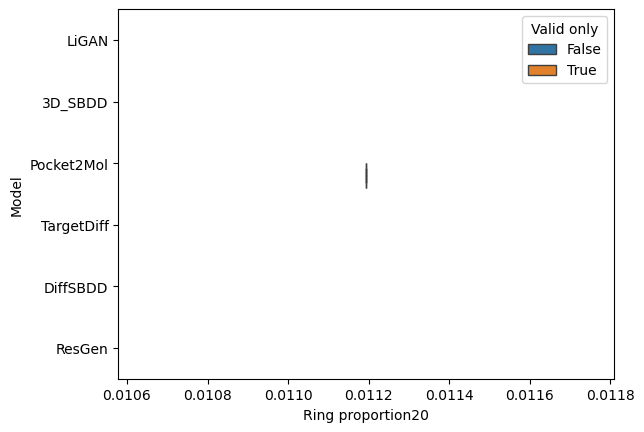

In [96]:
for column in df.columns[4:]:
    sns.boxplot(df[df['Minimized']], x=column, hue='Valid only', y='Model')
    plt.show()

In [103]:
score_rows = []
for ligand_filename in test_crossdocked.get_ligand_filenames():
    all_model_tested = len(d_results[ligand_filename][False]) == len(models)
    all_mini_model_tested = len(d_results[ligand_filename][True]) == len(models)
    if all_model_tested and all_mini_model_tested:
        for minimize in minimizes:
            for model in models:
                model_results = d_results[ligand_filename][minimize][model.name]
                if minimize:
                    set_names = ['minimized', 'minimized_valid']
                else:
                    set_names = ['raw', 'raw_valid']
                for set_name in set_names:
                    set_results = model_results[set_name]
                    for name, values in set_results.items():
                        if 'score' in name:
                            assert isinstance(values, list)
                            for value in values:
                                row = {'Model' : model.name,
                                      'Minimized': minimize,
                                      'Valid only': 'valid' in set_name,
                                      'Ligand filename': ligand_filename,
                                      'Name': name,
                                      'Value': value}
                                score_rows.append(row)

In [104]:
score_df = pd.DataFrame(score_rows)

In [115]:
def get_better_score(row):
    if 'PLP' in row['Name']:
        return row['Value'] > 0
    else:
        return row['Value'] < 0

In [106]:
relative_score_df = score_df[score_df['Name'].str.contains('Relative')]

In [116]:
relative_score_df['Better than native'] = relative_score_df.apply(get_better_score, axis=1)

/tmp/ipykernel_1894219/833521583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relative_score_df['Better than native'] = relative_score_df.apply(get_better_score, axis=1)


In [117]:
relative_score_df

Model  Minimized  ...    Value Better than native
385      LiGAN      False  ...   8.7700              False
386      LiGAN      False  ...   2.2010              False
387      LiGAN      False  ...   2.8970              False
388      LiGAN      False  ...   5.0210              False
389      LiGAN      False  ...   3.5180              False
...        ...        ...  ...      ...                ...
140013  ResGen       True  ...  -9.9895              False
140014  ResGen       True  ... -14.2227              False
140015  ResGen       True  ... -13.3000              False
140016  ResGen       True  ... -18.1036              False
140017  ResGen       True  ... -23.7628              False

[70009 rows x 7 columns]

In [124]:
grouped_score_df = relative_score_df.pivot_table(index=['Model', 'Minimized', 'Valid only', 'Ligand filename'], 
                                                 columns='Name',
                                                 values='Better than native',
                                                 aggfunc='mean')
grouped_score_df = grouped_score_df.reset_index()
grouped_score_df = grouped_score_df.sort_values('Model')

In [125]:
grouped_score_df

Name       Model  Minimized  ...  Relative PLP score Relative Vina score
0        3D_SBDD      False  ...            0.000000            0.085366
24       3D_SBDD       True  ...            0.298701            0.428571
25       3D_SBDD       True  ...            0.341176            0.129412
26       3D_SBDD       True  ...            0.051282            0.551282
27       3D_SBDD       True  ...            0.014925            0.000000
..           ...        ...  ...                 ...                 ...
213   TargetDiff      False  ...            0.000000            0.666667
214   TargetDiff      False  ...            0.000000            0.000000
215   TargetDiff      False  ...            0.000000            0.000000
217   TargetDiff       True  ...            0.000000            0.011905
238   TargetDiff       True  ...            0.653846            0.576923

[239 rows x 9 columns]

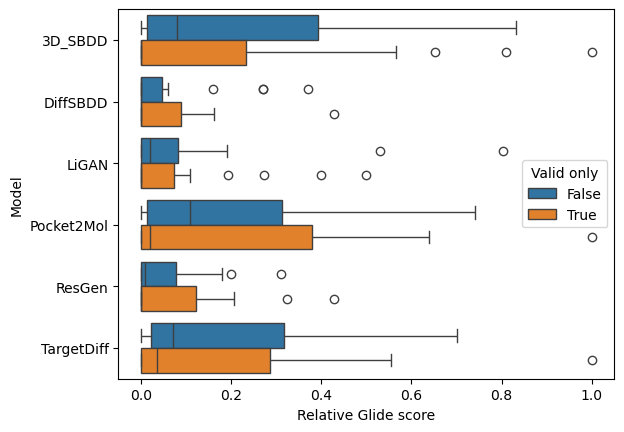

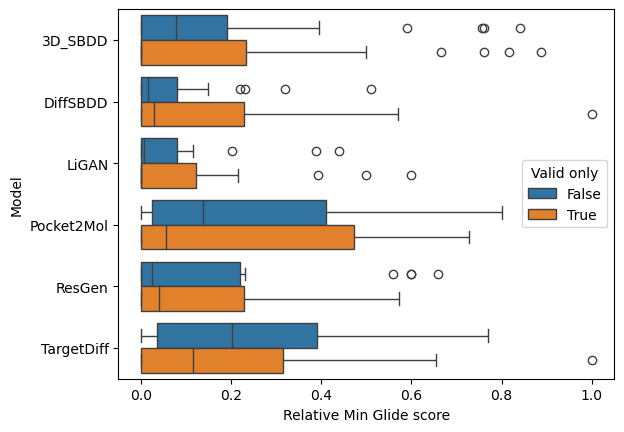

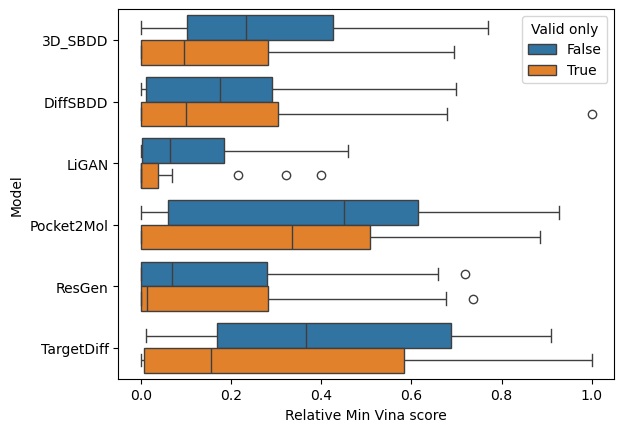

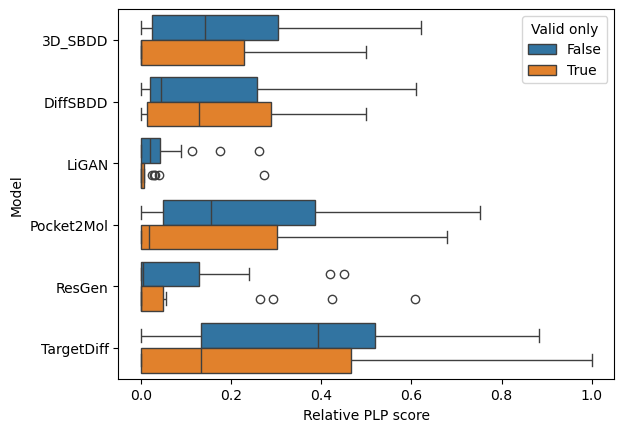

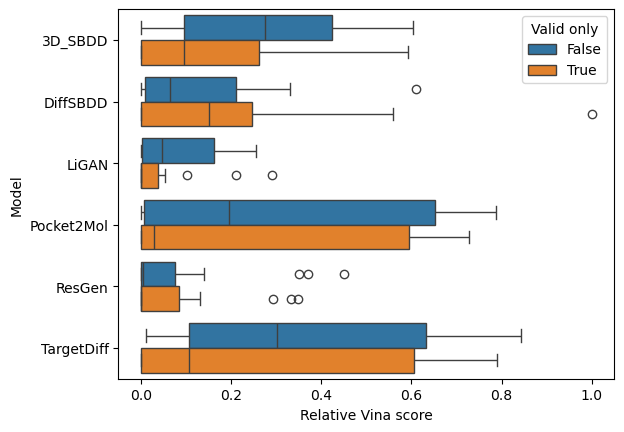

In [127]:
for column in grouped_score_df.columns[4:]:
    sns.boxplot(grouped_score_df, x=column, hue='Valid only', y='Model')
    plt.show()